# Calcul des variables explicatives : Les facteurs de production

( relatif à la partie ***3.3 - Les variables explicatives*** du rapport) 

In [20]:
# importation des packagesasty
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Importations des bases :
path_ISA = r'D:/Données/ENSAE/2A/Stat_App/ISA.csv'
ISA=pd.read_csv(path_ISA ,sep=',', encoding='latin-1')

# Pour la variable explicative, les bases qui nous intéressent sont les bases Q20,Q21,Q22 et Q23
path_ID = r'D:/Données/ENSAE/2A/Stat_App/SAE_2019/SAE 2019 Bases statistiques - formats SAS-CSV/Bases statistiques/Bases CSV/ID_2019r.csv'
ID=pd.read_csv(path_ID ,sep=';', encoding='latin-1')
path_Q20 = r'D:/Données/ENSAE/2A/Stat_App/SAE_2019/SAE 2019 Bases statistiques - formats SAS-CSV/Bases statistiques/Bases CSV/Q20_2019r.csv'
Q20=pd.read_csv(path_Q20 ,sep=';', encoding='latin-1')
path_Q21 = r'D:/Données/ENSAE/2A/Stat_App/SAE_2019/SAE 2019 Bases statistiques - formats SAS-CSV/Bases statistiques/Bases CSV/Q21_2019r.csv'
Q21=pd.read_csv(path_Q21 ,sep=';', encoding='latin-1')
path_Q22 = r'D:/Données/ENSAE/2A/Stat_App/SAE_2019/SAE 2019 Bases statistiques - formats SAS-CSV/Bases statistiques/Bases CSV/Q22_2019r.csv'
Q22=pd.read_csv(path_Q22 ,sep=';', encoding='latin-1')
path_Q23 = r'D:/Données/ENSAE/2A/Stat_App/SAE_2019/SAE 2019 Bases statistiques - formats SAS-CSV/Bases statistiques/Bases CSV/Q23_2019r.csv'
Q23=pd.read_csv(path_Q23 ,sep=';', encoding='latin-1')

## 1) Les établissements hors France métropolitaine [A ajouter dans notebook de Louise]

A partir de maintenant, on **supprime les établissements hors France métropolitaine**. On pourrait les étudier à part dans un second temps.

Arguments : 
- différences multiples avec les hopitaux en France métropolitaine
- certaines jointures impossibles
- moins de réponses à l'enquête SAE (notamment sur la base Q20)

In [ ]:
ISA

In [23]:
ISA = ISA[~ISA['Numero_finess'].astype(str).str.startswith('97')] #Suppression des établissements dans des départements d'Outre-Mer
ISA = ISA[~ISA['Numero_finess'].astype(str).str.startswith('98')] 

In [24]:
ISA['Numero_finess'].nunique()

1162

La base ISA compte désormais 1164 établissements, tous situés en France Métropolitaine.

## 1)  Effectuer la jonction entre la table ISA et les tables Q20,Q21,Q22 et Q23 

Tout d'abord, nous souhaitons ne garder que les établissements qui nous intéressent, ie ceux qui sont également dans la base ISA. Pour avoir un même "Numero_finess" sur toutes nos bases, on reprend le travail effectué pour la variable d'intérêt.

### A) Jointure entre la base Q20 (personnel médical) et la base ISA

La base ISA comporte 1173 établissements en France métropolitaine. Certains établissements de la base ISA sont représentés dans les bases Q20, Q22 et Q23 de la SAE par le numéro finess (fi) et d'autres par le numero finess de l'entité juridique(fi_ej).

In [ ]:
Q20_short_fi = Q20[["FI","PERSO","AN"]]
Q20_short_fi.groupby(by=["FI", "PERSO"]).count().sort_values(by="AN")
Q20_group_fi = Q20_short_fi.groupby(by=["FI", "PERSO"]).count().sort_values(by="AN")
Q20_group_fi = Q20_group_fi.rename(columns = {'AN': 'Nb_doublons_fi'})

Q20_group_fi = Q20_group_fi.reset_index()

#On réindexe, pour avoir une colonne avec les identifiants de chaque intervalle, 
#qu'on appelle id_int pour identifiant intervalle
Q20_group_fi['id_fi_perso'] = Q20_group_fi.index
Q20_group_fi.sort_values(by="Nb_doublons_fi")
Q20_group_fi

In [ ]:
Q20_fi=pd.merge(ISA, Q20, left_on = ['Numero_finess'], right_on = ['FI'],how='inner')
Q20_fi

In [28]:
print("fi : ",Q20_group_fi["id_fi_perso"].size,'\n',"fi uniques :",Q20_group_fi["id_fi_perso"].nunique())
# On remarque qu'il n'y a pas de doublons pour FI

fi :  33731 
 fi uniques : 33731


In [29]:
Q20_short_fiej= Q20[["FI_EJ","PERSO","AN"]]

In [30]:
Q20_short_fiej.groupby(by=["FI_EJ", "PERSO"]).count().sort_values(by="AN") 
# On remarque tout de suite que certaines lignes sont des doublons.

AN
FI_EJ     PERSO    
750826307 M1010   1
660000282 M1340   1
          M1200   1
          M1160   1
          M1150   1
...              ..
350000626 M9999  39
920030269 M1320  43
          M3050  61
          M1010  67
          M9999  76

[26546 rows x 1 columns]

In [31]:
Q20_group_fiej = Q20_short_fiej.groupby(by=["FI_EJ", "PERSO"]).count().sort_values(by="AN")
Q20_group_fiej = Q20_group_fiej.rename(columns = {'AN': 'Nb_doublons_fiej'})

#On a encore engine_serial_number et Interpolate_WW_rank en index, on les enlève
Q20_group_fiej = Q20_group_fiej.reset_index()

#On réindexe, pour avoir une colonne avec les identifiants de chaque intervalle, 
#qu'on appelle id_int pour identifiant intervalle
Q20_group_fiej['id_fiej_perso'] = Q20_group_fiej.index
Q20_group_fiej.sort_values(by="Nb_doublons_fiej")
Q20_group_fiej


,FI_EJ,PERSO,Nb_doublons_fiej,id_fiej_perso
0,750826307,M1010,1,0
1,660000282,M1340,1,1
2,660000282,M1200,1,2
3,660000282,M1160,1,3
4,660000282,M1150,1,4
...,...,...,...,...
26541,350000626,M9999,39,26541
26542,920030269,M1320,43,26542
26543,920030269,M3050,61,26543
26544,920030269,M1010,67,26544


In [32]:
print("On a", Q20_group_fiej[(Q20_group_fiej.Nb_doublons_fiej > 1)].shape[0], "cas où il y plusieurs lignes pour un même type de métier d'un même hôpital")

On a 3252 cas où il y plusieurs lignes pour un même type de métier d'un même hôpital


In [ ]:
Q20_id = pd.merge(Q20, Q20_group_fiej, left_on = ["FI_EJ", "PERSO"], right_on = ["FI_EJ", "PERSO"], how="inner")
Q20_id

In [34]:
Q20_doublon = Q20_id[(Q20_id.Nb_doublons_fiej > 1)]
Q20_2 = Q20_id[~(Q20_id.Nb_doublons_fiej > 1)]

In [ ]:
# On fait la moyenne pour toutes les lignes avec des doublons
### ATTENTION : exécuter cette cellule peut prendre quelques minutes
for i in Q20_doublon['id_fiej_perso'].unique():
    moyenne_EFFSALPLH = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['EFFSALPLH'].mean()
    moyenne_EFFSALPLF = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['EFFSALPLF'].mean()
    moyenne_EFFSALPAH = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['EFFSALPAH'].mean()
    moyenne_EFFSALPAF = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['EFFSALPAF'].mean()
    moyenne_ETPSALH = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['ETPSALH'].mean()
    moyenne_ETPSALF = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['ETPSALF'].mean()
    moyenne_ETP_PU = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['ETP_PU'].mean()
    moyenne_ETP_PH = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['ETP_PH'].mean()
    moyenne_ETP_AS = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['ETP_AS'].mean()
    moyenne_ETP_HU = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['ETP_HU'].mean()
    moyenne_ETP_AT = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['ETP_AT'].mean()
    moyenne_ETP_AU = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['ETP_AU'].mean()
    moyenne_EFFSAL = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['EFFSAL'].mean()
    moyenne_ETPSAL = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['ETPSAL'].mean()
    moyenne_EFFLIB = Q20_doublon[Q20_doublon['id_fiej_perso']==i]['EFFLIB'].mean()
    
    Indexs_Q20_doublon = Q20_doublon[Q20_doublon['id_fiej_perso']==i].index
    Q20_doublon['EFFSALPLH'][Indexs_Q20_doublon] = float(moyenne_EFFSALPLH)
    Q20_doublon['EFFSALPLF'][Indexs_Q20_doublon] = float(moyenne_EFFSALPLF)
    Q20_doublon['EFFSALPAH'][Indexs_Q20_doublon] = float(moyenne_EFFSALPAH)
    Q20_doublon['EFFSALPAF'][Indexs_Q20_doublon] = float(moyenne_EFFSALPAF)
    Q20_doublon['ETPSALH'][Indexs_Q20_doublon] = float(moyenne_ETPSALH)
    Q20_doublon['ETPSALF'][Indexs_Q20_doublon] = float(moyenne_ETPSALF)
    Q20_doublon['ETP_PU'][Indexs_Q20_doublon] = float(moyenne_ETP_PU)
    Q20_doublon['ETP_PH'][Indexs_Q20_doublon] = float(moyenne_ETP_PH)
    Q20_doublon['ETP_AS'][Indexs_Q20_doublon] = float(moyenne_ETP_AS)
    Q20_doublon['ETP_HU'][Indexs_Q20_doublon] = float(moyenne_ETP_HU)
    Q20_doublon['ETP_AT'][Indexs_Q20_doublon] = float(moyenne_ETP_AT)
    Q20_doublon['ETP_AU'][Indexs_Q20_doublon] = float(moyenne_ETP_AU)
    Q20_doublon['EFFSAL'][Indexs_Q20_doublon] = float(moyenne_EFFSAL)
    Q20_doublon['ETPSAL'][Indexs_Q20_doublon] = float(moyenne_ETPSAL)
    Q20_doublon['EFFLIB'][Indexs_Q20_doublon] = float(moyenne_EFFLIB)
    
Q20_doublon.head(10)

In [36]:
Q20_fiej_tot = pd.concat([Q20_doublon, Q20_2])

In [37]:
#On garde la première ligne
df_Q20_fiej = pd.DataFrame(Q20_fiej_tot)
df_Q20_fiej.drop_duplicates(subset= "id_fiej_perso", keep = 'first', inplace=True)

In [38]:
Q20_fiej =pd.merge(ISA, df_Q20_fiej, left_on = ['Numero_finess'], right_on = ['FI_EJ'],how='inner')
Q20_fiej

,Numero_finess,Points_ISA,stjr,BOR,AN,FI,FI_EJ,PERSO,EFFSALPLH,EFFSALPLF,...,ETP_PH,ETP_AS,ETP_HU,ETP_AT,ETP_AU,EFFSAL,ETPSAL,EFFLIB,Nb_doublons_fiej,id_fiej_perso
0,010008407,1.650548e+05,1,Q20,2019,010005239,010008407,M1010,3.666667,1.000000,...,1.086667,0.000000,0.0,0.126667,4.046667,6.000000,5.26,0.0,3,25871
1,010008407,1.650548e+05,1,Q20,2019,010005239,010008407,M3050,0.333333,1.333333,...,0.616667,0.333333,0.0,0.000000,0.000000,1.666667,0.95,0.0,3,25941
2,010008407,1.650548e+05,1,Q20,2019,010005239,010008407,M9999,9.000000,3.000000,...,7.286667,0.610000,0.0,0.750000,6.433333,20.000000,15.08,0.0,3,25942
3,010008407,1.650548e+05,1,Q20,2019,010005239,010008407,M1030,2.000000,0.000000,...,0.600000,0.830000,0.0,0.000000,3.900000,5.000000,5.33,0.0,1,16709
4,010008407,1.650548e+05,1,Q20,2019,010005239,010008407,M1040,0.000000,0.000000,...,0.600000,0.000000,0.0,0.000000,0.000000,1.000000,0.60,0.0,1,16804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10539,950110080,1.204192e+06,1,Q20,2019,950000364,950110080,M3030,1.000000,0.000000,...,1.000000,0.000000,0.0,0.700000,0.000000,6.000000,1.70,NaN,1,8224
10540,950110080,1.204192e+06,1,Q20,2019,950000364,950110080,M3040,1.000000,0.000000,...,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.00,NaN,1,8222
10541,950110080,1.204192e+06,1,Q20,2019,950000364,950110080,M3050,5.000000,1.000000,...,6.000000,0.180000,0.0,0.000000,0.820000,7.000000,7.00,NaN,1,8221
10542,950110080,1.204192e+06,1,Q20,2019,950000364,950110080,M3070,2.000000,4.000000,...,3.000000,0.980000,0.0,0.230000,1.310000,9.000000,5.52,NaN,1,8220


In [39]:
Q20_good= pd.concat([Q20_fiej, Q20_fi] )
Q20_good

,Numero_finess,Points_ISA,stjr,BOR,AN,FI,FI_EJ,PERSO,EFFSALPLH,EFFSALPLF,...,ETP_PH,ETP_AS,ETP_HU,ETP_AT,ETP_AU,EFFSAL,ETPSAL,EFFLIB,Nb_doublons_fiej,id_fiej_perso
0,010008407,165054.798333,1,Q20,2019,010005239,010008407,M1010,3.666667,1.000000,...,1.086667,0.000000,0.0,0.126667,4.046667,6.000000,5.26,0.0,3.0,25871.0
1,010008407,165054.798333,1,Q20,2019,010005239,010008407,M3050,0.333333,1.333333,...,0.616667,0.333333,0.0,0.000000,0.000000,1.666667,0.95,0.0,3.0,25941.0
2,010008407,165054.798333,1,Q20,2019,010005239,010008407,M9999,9.000000,3.000000,...,7.286667,0.610000,0.0,0.750000,6.433333,20.000000,15.08,0.0,3.0,25942.0
3,010008407,165054.798333,1,Q20,2019,010005239,010008407,M1030,2.000000,0.000000,...,0.600000,0.830000,0.0,0.000000,3.900000,5.000000,5.33,0.0,1.0,16709.0
4,010008407,165054.798333,1,Q20,2019,010005239,010008407,M1040,0.000000,0.000000,...,0.600000,0.000000,0.0,0.000000,0.000000,1.000000,0.60,0.0,1.0,16804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11006,950807982,177318.826667,2,Q20,2019,950807982,950001636,M3011,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
11007,950807982,177318.826667,2,Q20,2019,950807982,950001636,M3020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
11008,950807982,177318.826667,2,Q20,2019,950807982,950001636,M3040,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.00,NaN,NaN,NaN
11009,950807982,177318.826667,2,Q20,2019,950807982,950001636,M3050,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,2.000000,2.00,NaN,NaN,NaN


In [40]:
print("Il nous manque:", ISA[~ISA["Numero_finess"].isin(Q20_good["Numero_finess"])]["Numero_finess"].shape[0], "établissements.")

Il nous manque: 6 établissements.


Lorsque l'on effectue la jointure, 5 établissements présents sur la base ISA disparaissent et ne sont plus sur la nouvelle table. Nous devons les regarder, pour savoir à quoi est due cette disparition

- Observation des données manquantes : 

In [41]:
ISA_5 = ISA[~ISA["Numero_finess"].isin(Q20_good["Numero_finess"])]
ISA_5

,Numero_finess,Points_ISA,stjr
479,670020098,9344.040000,3
734,100000157,4551.390000,2
831,330780255,22251.530000,2
884,440000651,6613.990000,2
886,440024982,31024.516667,2
1075,780300364,14503.930000,2


In [42]:
#On supprime ces établissements de Q20_good :
Q20_good = Q20_good[(Q20_good.Numero_finess != "670020098")]
Q20_good = Q20_good[(Q20_good.Numero_finess != "100000157")]
Q20_good = Q20_good[(Q20_good.Numero_finess != "330780255")]
Q20_good = Q20_good[(Q20_good.Numero_finess != "440000651")]
Q20_good = Q20_good[(Q20_good.Numero_finess != "440024982")]
Q20_good = Q20_good[(Q20_good.Numero_finess != "780300364")]

In [43]:
#On supprime les établissements qui posent problème avec Q23
Q20_good = Q20_good[(Q20_good.Numero_finess != "520004680")]
Q20_good = Q20_good[(Q20_good.Numero_finess != "520004714")]
Q20_good = Q20_good[(Q20_good.Numero_finess != "560029068")]
Q20_good = Q20_good[(Q20_good.Numero_finess != "840019053")]

En comparant avec la liste des établissements de santé dont les enquêtes sont facultatives, on retrouve de nombreux hopitaux. Je n'ai trouvé que la liste de 2014, disponible sur ce lien : https://www.fehap.fr/jcms/liste-des-etablissements-pour-lesquels-l-enquete-est-facultative-fehap_115923. Pour transférer cette base et pouvoir l'utiliser, il faut supprimer les deux premières lignes, et l'enregistrer au format CSV avec comme séparateur le point-virgule.

**Analyse détaillée des établissements** : 
-  *670020098* :Groupement de coopération sanitaire de moyens - Exploitant, ouvert le 18 novembre 2019 : il n'est pas présent dans la base SAE de 2019. 
- *100009075* : fait partie des établissements pour lesquels répondre à l'enquête SAE est facultatif
- *330780255* : Etablissement de Soins Chirurgicaux : N° FINESS de l'entité juridique de rattachement :	33 001 005 9 : 
    Ni le FI ni le FI_EJ ne sont présents dans la base Q20_2019r
- *440000651* : Etablissement de Soins Chirurgicaux : N° FINESS de l'entité juridique de rattachement :	440001212
    Ni le FI ni le FI_EJ ne sont présents dans la base Q20_2019r
- *440024982* : CLINIQUE SAINT-AUGUSTIN, introuvable sur le site FINESS et dans la base Q20_2019r
   

Pour la suite, on fait l'hypothèse que ces établissements sont d'autres établissements qui n'ont pas à répondre à la partie Q20 de l'enquête SAE. Pour la base Q20, on peut donc garder ***Q20_good*** qui correspond à la base Q20 avec les différents numéro finess.

#### B) ISA et la base Q21

In [44]:
Q21

,BOR,AN,FI,FI_EJ,DISCI,ETP_SAL,ETP_HU,ETP_MAD,ETP_INT,EFF_LIB
0,Q21,2019,010000024,010780054,1000,1.48,NaN,NaN,NaN,NaN
1,Q21,2019,010000024,010780054,2000,153.69,NaN,4.81,65.03,11.0
2,Q21,2019,010000024,010780054,2100,151.59,NaN,4.81,64.70,11.0
3,Q21,2019,010000024,010780054,2300,2.10,NaN,NaN,0.33,NaN
4,Q21,2019,010000024,010780054,9999,155.17,NaN,4.81,65.03,11.0
...,...,...,...,...,...,...,...,...,...,...
13591,Q21,2019,980500011,980500003,2200,10.10,NaN,NaN,1.12,NaN
13592,Q21,2019,980500011,980500003,9999,224.98,NaN,NaN,54.75,NaN
13593,Q21,2019,980500763,970407250,2000,3.00,NaN,NaN,NaN,NaN
13594,Q21,2019,980500763,970407250,2100,3.00,NaN,NaN,NaN,NaN


In [45]:
Q21_short_fi = Q21[["FI","DISCI","AN"]]
Q21_short_fi.groupby(by=["FI", "DISCI"]).count().sort_values(by="AN")
Q21_group_fi = Q21_short_fi.groupby(by=["FI", "DISCI"]).count().sort_values(by="AN")
Q21_group_fi = Q21_group_fi.rename(columns = {'AN': 'Nb_doublons_fi'})

Q21_group_fi = Q21_group_fi.reset_index()

#On réindexe, pour avoir une colonne avec les identifiants de fi et perso
Q21_group_fi['id_fi_perso'] = Q21_group_fi.index
Q21_group_fi.sort_values(by="Nb_doublons_fi")
Q21_group_fi

,FI,DISCI,Nb_doublons_fi,id_fi_perso
0,010000024,1000,1,0
1,680020096,9999,1,1
2,680020427,2000,1,2
3,680020427,2400,1,3
4,680020427,2500,1,4
...,...,...,...,...
13591,350005021,2100,1,13591
13592,350005021,2400,1,13592
13593,350005021,2500,1,13593
13594,350005146,2000,1,13594


In [46]:
Q21_fi=pd.merge(ISA, Q21, left_on = ['Numero_finess'], right_on = ['FI'],how='inner')
Q21_fi

,Numero_finess,Points_ISA,stjr,BOR,AN,FI,FI_EJ,DISCI,ETP_SAL,ETP_HU,ETP_MAD,ETP_INT,EFF_LIB
0,060000528,356892.030000,3,Q21,2019,060000528,060780962,1000,1.20,NaN,NaN,NaN,NaN
1,060000528,356892.030000,3,Q21,2019,060000528,060780962,2000,89.93,8.61,NaN,30.67,NaN
2,060000528,356892.030000,3,Q21,2019,060000528,060780962,2100,89.93,8.61,NaN,30.67,NaN
3,060000528,356892.030000,3,Q21,2019,060000528,060780962,9999,91.13,8.61,NaN,30.67,NaN
4,060780491,372410.435000,3,Q21,2019,060780491,060790797,2000,0.17,NaN,NaN,NaN,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,950300350,11099.390000,2,Q21,2019,950300350,950015438,2100,1.80,NaN,NaN,NaN,24.0
2378,950300350,11099.390000,2,Q21,2019,950300350,950015438,9999,1.80,NaN,NaN,NaN,24.0
2379,950807982,177318.826667,2,Q21,2019,950807982,950001636,2000,4.30,NaN,NaN,NaN,143.0
2380,950807982,177318.826667,2,Q21,2019,950807982,950001636,2100,4.30,NaN,NaN,NaN,143.0


In [47]:
print("fi : ",Q21_group_fi["id_fi_perso"].size,'\n',"fi uniques :",Q21_group_fi["id_fi_perso"].nunique())
# On remarque qu'il n'y a pas de doublons pour FI

fi :  13596 
 fi uniques : 13596


In [48]:
Q21_short_fiej= Q21[["FI_EJ","DISCI","AN"]]

In [49]:
Q21_short_fiej.groupby(by=["FI_EJ", "DISCI"]).count().sort_values(by="AN") 
# On remarque tout de suite que certaines lignes sont des doublons.

AN
FI_EJ     DISCI    
010000156 1000    1
640780862 2100    1
          2000    1
640780839 9999    1
          2400    1
...              ..
350000626 9999   39
          2000   39
920030269 2400   59
          2000   76
          9999   76

[8897 rows x 1 columns]

In [50]:
Q21_group_fiej = Q21_short_fiej.groupby(by=["FI_EJ", "DISCI"]).count().sort_values(by="AN")
Q21_group_fiej = Q21_group_fiej.rename(columns = {'AN': 'Nb_doublons_fiej'})

#On a encore engine_serial_number et Interpolate_WW_rank en index, on les enlève
Q21_group_fiej = Q21_group_fiej.reset_index()

#On réindexe, pour avoir une colonne avec les identifiants de chaque intervalle, 
#qu'on appelle id_int pour identifiant intervalle
Q21_group_fiej['id_fiej_perso'] = Q21_group_fiej.index
Q21_group_fiej.sort_values(by="Nb_doublons_fiej")
Q21_group_fiej


,FI_EJ,DISCI,Nb_doublons_fiej,id_fiej_perso
0,010000156,1000,1,0
1,640780862,2100,1,1
2,640780862,2000,1,2
3,640780839,9999,1,3
4,640780839,2400,1,4
...,...,...,...,...
8892,350000626,9999,39,8892
8893,350000626,2000,39,8893
8894,920030269,2400,59,8894
8895,920030269,2000,76,8895


In [51]:
print("On a", Q21_group_fiej[(Q21_group_fiej.Nb_doublons_fiej > 1)].shape[0], "cas où il y plusieurs lignes pour un même type de métier d'un même hôpital")

On a 1758 cas où il y plusieurs lignes pour un même type de métier d'un même hôpital


In [52]:
Q21_id = pd.merge(Q21, Q21_group_fiej, left_on = ["FI_EJ", "DISCI"], right_on = ["FI_EJ", "DISCI"], how="inner")
Q21_id

,BOR,AN,FI,FI_EJ,DISCI,ETP_SAL,ETP_HU,ETP_MAD,ETP_INT,EFF_LIB,Nb_doublons_fiej,id_fiej_perso
0,Q21,2019,010000024,010780054,1000,1.48,NaN,NaN,NaN,NaN,1,5213
1,Q21,2019,010000024,010780054,2000,153.69,NaN,4.81,65.03,11.0,2,7265
2,Q21,2019,010009314,010780054,2000,5.56,NaN,NaN,NaN,NaN,2,7265
3,Q21,2019,010000024,010780054,2100,151.59,NaN,4.81,64.70,11.0,1,5212
4,Q21,2019,010000024,010780054,2300,2.10,NaN,NaN,0.33,NaN,1,5211
...,...,...,...,...,...,...,...,...,...,...,...,...
13461,Q21,2019,980500011,980500003,2200,10.10,NaN,NaN,1.12,NaN,1,1207
13462,Q21,2019,980500011,980500003,9999,224.98,NaN,NaN,54.75,NaN,1,3927
13463,Q21,2019,980500763,970407250,2000,3.00,NaN,NaN,NaN,NaN,1,2607
13464,Q21,2019,980500763,970407250,2100,3.00,NaN,NaN,NaN,NaN,1,2634


In [53]:
Q21_doublon = Q21_id[(Q21_id.Nb_doublons_fiej > 1)]
Q21_2 = Q21_id[~(Q21_id.Nb_doublons_fiej > 1)]

In [ ]:
# On fait la moyenne pour toutes les lignes avec des doublons
### ATTENTION : exécuter cette cellule peut prendre quelques minutes
for i in Q21_doublon['id_fiej_perso'].unique():
    moyenne_ETP_SAL = Q21_doublon[Q21_doublon['id_fiej_perso']==i]['ETP_SAL'].mean()
    moyenne_ETP_HU = Q21_doublon[Q21_doublon['id_fiej_perso']==i]['ETP_HU'].mean()
    moyenne_ETP_MAD = Q21_doublon[Q21_doublon['id_fiej_perso']==i]['ETP_MAD'].mean()
    moyenne_ETP_INT = Q21_doublon[Q21_doublon['id_fiej_perso']==i]['ETP_INT'].mean()
    moyenne_EFF_LIB = Q21_doublon[Q21_doublon['id_fiej_perso']==i]['EFF_LIB'].mean()
    
    Indexs_Q21_doublon = Q21_doublon[Q21_doublon['id_fiej_perso']==i].index
    Q21_doublon['ETP_SAL'][Indexs_Q21_doublon] = float(moyenne_ETP_SAL)
    Q21_doublon['ETP_HU'][Indexs_Q21_doublon] = float(moyenne_ETP_HU)
    Q21_doublon['ETP_MAD'][Indexs_Q21_doublon] = float(moyenne_ETP_MAD)
    Q21_doublon['ETP_INT'][Indexs_Q21_doublon] = float(moyenne_ETP_INT)
    Q21_doublon['EFF_LIB'][Indexs_Q21_doublon] = float(moyenne_EFF_LIB)
    
Q21_doublon.head(10)

In [55]:
Q21_fiej_tot = pd.concat([Q21_doublon, Q21_2])

In [56]:
#On garde la première ligne
df_Q21_fiej = pd.DataFrame(Q21_fiej_tot)
df_Q21_fiej.drop_duplicates(subset= "id_fiej_perso", keep = 'first', inplace=True)

In [57]:
Q21_fiej =pd.merge(ISA, df_Q21_fiej, left_on = ['Numero_finess'], right_on = ['FI_EJ'],how='inner')
Q21_fiej

,Numero_finess,Points_ISA,stjr,BOR,AN,FI,FI_EJ,DISCI,ETP_SAL,ETP_HU,ETP_MAD,ETP_INT,EFF_LIB,Nb_doublons_fiej,id_fiej_perso
0,010008407,1.650548e+05,1,Q21,2019,010005239,010008407,2000,14.613333,0.0,NaN,0.00,NaN,3,8215
1,010008407,1.650548e+05,1,Q21,2019,010005239,010008407,9999,15.080000,0.0,NaN,0.00,NaN,3,8191
2,010008407,1.650548e+05,1,Q21,2019,010786259,010008407,2500,0.700000,0.0,NaN,0.00,NaN,2,7255
3,010008407,1.650548e+05,1,Q21,2019,010005239,010008407,1000,1.400000,0.0,NaN,0.00,NaN,1,5223
4,010008407,1.650548e+05,1,Q21,2019,010005239,010008407,2100,41.280000,0.0,NaN,0.00,NaN,1,5222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,950110080,1.204192e+06,1,Q21,2019,950000364,950110080,2000,284.730000,0.5,0.0,99.19,NaN,1,2851
2886,950110080,1.204192e+06,1,Q21,2019,950000364,950110080,2100,263.440000,0.5,NaN,96.07,NaN,1,2852
2887,950110080,1.204192e+06,1,Q21,2019,950000364,950110080,2200,17.450000,0.0,0.0,2.97,NaN,1,2853
2888,950110080,1.204192e+06,1,Q21,2019,950000364,950110080,2400,3.840000,0.0,0.0,0.15,NaN,1,2880


In [58]:
Q21_good= pd.concat([Q21_fiej, Q21_fi] )
Q21_good

,Numero_finess,Points_ISA,stjr,BOR,AN,FI,FI_EJ,DISCI,ETP_SAL,ETP_HU,ETP_MAD,ETP_INT,EFF_LIB,Nb_doublons_fiej,id_fiej_perso
0,010008407,165054.798333,1,Q21,2019,010005239,010008407,2000,14.613333,0.0,NaN,0.0,NaN,3.0,8215.0
1,010008407,165054.798333,1,Q21,2019,010005239,010008407,9999,15.080000,0.0,NaN,0.0,NaN,3.0,8191.0
2,010008407,165054.798333,1,Q21,2019,010786259,010008407,2500,0.700000,0.0,NaN,0.0,NaN,2.0,7255.0
3,010008407,165054.798333,1,Q21,2019,010005239,010008407,1000,1.400000,0.0,NaN,0.0,NaN,1.0,5223.0
4,010008407,165054.798333,1,Q21,2019,010005239,010008407,2100,41.280000,0.0,NaN,0.0,NaN,1.0,5222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,950300350,11099.390000,2,Q21,2019,950300350,950015438,2100,1.800000,NaN,NaN,NaN,24.0,NaN,NaN
2378,950300350,11099.390000,2,Q21,2019,950300350,950015438,9999,1.800000,NaN,NaN,NaN,24.0,NaN,NaN
2379,950807982,177318.826667,2,Q21,2019,950807982,950001636,2000,4.300000,NaN,NaN,NaN,143.0,NaN,NaN
2380,950807982,177318.826667,2,Q21,2019,950807982,950001636,2100,4.300000,NaN,NaN,NaN,143.0,NaN,NaN


In [59]:
print("Il nous manque:", ISA[~ISA["Numero_finess"].isin(Q21_good["Numero_finess"])]["Numero_finess"].shape[0], "établissements.")

Il nous manque: 6 établissements.


In [60]:
ISA_5_21 = ISA[~ISA["Numero_finess"].isin(Q21_good["Numero_finess"])]
ISA_5_21


,Numero_finess,Points_ISA,stjr
479,670020098,9344.040000,3
734,100000157,4551.390000,2
831,330780255,22251.530000,2
884,440000651,6613.990000,2
886,440024982,31024.516667,2
1075,780300364,14503.930000,2


In [61]:
# Ce sont exactement les mêmes établissements que Q20
ISA_5_Q20 = ISA[~ISA["Numero_finess"].isin(Q20_good["Numero_finess"])]
ISA_5_Q20

,Numero_finess,Points_ISA,stjr
339,520004680,126991.370000,3
340,520004714,77375.870000,3
375,560029068,129285.330000,3
479,670020098,9344.040000,3
632,840019053,2536.030000,3
734,100000157,4551.390000,2
831,330780255,22251.530000,2
884,440000651,6613.990000,2
886,440024982,31024.516667,2
1075,780300364,14503.930000,2


In [62]:
#On supprime ces établissements de Q20_good :
Q21_good = Q21_good[(Q21_good.Numero_finess != "670020098")]
Q21_good = Q21_good[(Q21_good.Numero_finess != "100000157")]
Q21_good = Q21_good[(Q21_good.Numero_finess != "330780255")]
Q21_good = Q21_good[(Q21_good.Numero_finess != "440000651")]
Q21_good = Q21_good[(Q21_good.Numero_finess != "440024982")]
Q21_good = Q21_good[(Q21_good.Numero_finess != "780300364")]

In [63]:
#On enlève ceux qui posent problème pour Q23
Q21_good = Q21_good[(Q21_good.Numero_finess != "520004680")]
Q21_good = Q21_good[(Q21_good.Numero_finess != "520004714")]
Q21_good = Q21_good[(Q21_good.Numero_finess != "560029068")]
Q21_good = Q21_good[(Q21_good.Numero_finess != "840019053")]

Les mêmes établissements sont absents de la base Q20 et Q21

In [64]:
Q21_good_INT = Q21_good[Q21_good.ETP_INT >0]

In [65]:
Q21_good_INT

,Numero_finess,Points_ISA,stjr,BOR,AN,FI,FI_EJ,DISCI,ETP_SAL,ETP_HU,ETP_MAD,ETP_INT,EFF_LIB,Nb_doublons_fiej,id_fiej_perso
11,010780054,787929.068333,1,Q21,2019,010000024,010780054,2000,79.625,NaN,4.81,65.03,11.0,2.0,7265.0
12,010780054,787929.068333,1,Q21,2019,010000024,010780054,9999,80.365,NaN,4.81,65.03,11.0,2.0,7371.0
14,010780054,787929.068333,1,Q21,2019,010000024,010780054,2100,151.590,NaN,4.81,64.70,11.0,1.0,5212.0
15,010780054,787929.068333,1,Q21,2019,010000024,010780054,2300,2.100,NaN,NaN,0.33,NaN,1.0,5211.0
19,010780062,188174.950000,1,Q21,2019,010000032,010780062,2000,29.450,NaN,NaN,2.15,NaN,1.0,5207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,940300270,119607.230000,2,Q21,2019,940300270,940000771,9999,3.000,NaN,NaN,0.50,107.0,NaN,NaN
2327,940300445,58490.550000,2,Q21,2019,940300445,940000854,2000,6.340,NaN,NaN,4.19,36.0,NaN,NaN
2328,940300445,58490.550000,2,Q21,2019,940300445,940000854,2100,5.340,NaN,NaN,3.19,36.0,NaN,NaN
2329,940300445,58490.550000,2,Q21,2019,940300445,940000854,2400,1.000,NaN,NaN,1.00,NaN,NaN,NaN


In [66]:
labels_names = {'Public': 1, 'Privé lucratif': 2, 'Privé non lucratif': 3}

([<matplotlib.patches.Wedge at 0x1fa001a65c8>,
 [Text(-0.7997167255511382, 0.7552834956979834, 'Public'),
  Text(0.5509421425985096, -0.9520833763431455, 'Privé lucratif'),
  Text(1.054264089859589, -0.313890472669262, 'Privé non lucratif')],
 [Text(-0.4362091230278935, 0.41197281583526363, '75.91%'),
  Text(0.30051389596282335, -0.5193182052780794, '14.88%'),
  Text(0.5750531399234121, -0.17121298509232472, '9.21%')])

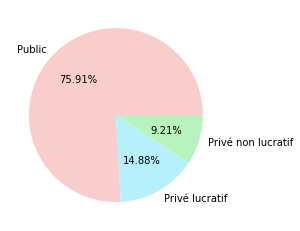

In [67]:
colors = ['#facdcd','#b6f0fc','#b8f2be']
plt.pie(Q21_good_INT["stjr"].value_counts(), labels = labels_names,
           colors = colors,
           autopct = lambda x: str(round(x, 2)) + '%')

#### C) ISA et la base Q22

On utilise directement la méthode présenté au dessus pour avoir le même numéro finess avec la base Q22, présentant les données sur les internes.

In [68]:
Q22['FI'].nunique()

1072

 => on a 1072 numéro finess différents, soient autant que dans ISA MAIS si ca se trouve se sont des établissements qui ne font pas partis de notre champ d'étude

In [69]:
ISA['Numero_finess'].nunique()

1162

In [70]:
print("fi: ",Q22["FI"].size,'\n',"fi uniques :",Q22["FI"].nunique())

fi:  1072 
 fi uniques : 1072


In [71]:
# On retire les lignes identiques pour la fusion
df_Q22_fi = pd.DataFrame(Q22)
df_Q22_fi.drop_duplicates(subset ="FI", keep = 'first', inplace=True)

In [72]:
# On fusionne ISA et Q22, pour avoir les mêmes numéros FINESS
Q22_fi=pd.merge(ISA, df_Q22_fi, left_on = ['Numero_finess'], right_on = ['FI'],how='inner')
Q22_fi.head(5)

,Numero_finess,Points_ISA,stjr,BOR,AN,FI,FI_EJ,INTMED,INTPHA,INTODO,INTGEN,INTURG,FFI,INTTOT
0,060000528,356892.030000,3,Q22,2019,060000528,060780962,28.0,2.0,NaN,NaN,NaN,NaN,30
1,060780947,174552.540000,3,Q22,2019,060780947,060800174,41.0,NaN,NaN,6.0,NaN,NaN,47
2,060791811,146432.633333,3,Q22,2019,060791811,060010808,2.0,0.0,0.0,3.0,1.0,0.0,6
3,060794013,238173.260000,3,Q22,2019,060794013,060790797,4.0,NaN,NaN,NaN,NaN,NaN,4
4,130001647,854787.985000,3,Q22,2019,130001647,130784127,68.0,7.0,NaN,NaN,NaN,6.0,81


test en ne gardant que ceux qui n'ont pas été gardé dans le premier merge

In [73]:
print("fi_ej : ",Q22["FI_EJ"].size,'\n',"fi_ej uniques :",Q22["FI_EJ"].nunique())
# On remarque qu'il y a des doublons

fi_ej :  1072 
 fi_ej uniques : 743


In [ ]:
# Avant de supprimer les doublons, on fait la moyenne de leur valeurs pour qu'ils soient le plus représentatifs des hopitaux qui les concernent
for i in Q22['FI_EJ'].unique():
    moyenne_INTTOT = Q22[Q22['FI_EJ']==i]['INTTOT'].mean()
    moyenne_INTMED = Q22[Q22['FI_EJ']==i]['INTMED'].mean()
    moyenne_INTPHA = Q22[Q22['FI_EJ']==i]['INTPHA'].mean()
    moyenne_INTODO = Q22[Q22['FI_EJ']==i]['INTODO'].mean()
    moyenne_INTGEN = Q22[Q22['FI_EJ']==i]['INTGEN'].mean()
    moyenne_INTURG = Q22[Q22['FI_EJ']==i]['INTURG'].mean()
    moyenne_FFI = Q22[Q22['FI_EJ']==i]['FFI'].mean()
    Indexs_Q22 = Q22[Q22['FI_EJ']==i].index
    Q22['INTTOT'][Indexs_Q22] = float(moyenne_INTTOT)
    Q22['INTMED'][Indexs_Q22] = float(moyenne_INTMED)
    Q22['INTPHA'][Indexs_Q22] = float(moyenne_INTPHA)
    Q22['INTODO'][Indexs_Q22] = float(moyenne_INTODO)
    Q22['INTGEN'][Indexs_Q22] = float(moyenne_INTGEN)
    Q22['INTURG'][Indexs_Q22] = float(moyenne_INTURG)
    Q22['FFI'][Indexs_Q22] = float(moyenne_FFI)
Q22.head(10)

In [75]:
Q22.sort_values(by="FI_EJ").head(10)

,BOR,AN,FI,FI_EJ,INTMED,INTPHA,INTODO,INTGEN,INTURG,FFI,INTTOT
3,Q22,2019,010000198,010007987,NaN,NaN,NaN,1.0,NaN,NaN,1.0
0,Q22,2019,010000024,010780054,24.0,3.0,NaN,19.0,5.0,15.0,66.0
1,Q22,2019,010000032,010780062,NaN,NaN,NaN,5.0,NaN,NaN,5.0
2,Q22,2019,010000065,010780096,NaN,NaN,NaN,0.0,NaN,2.0,2.0
4,Q22,2019,010000495,010783009,4.0,NaN,NaN,NaN,NaN,3.0,7.0
5,Q22,2019,020000089,020000022,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,Q22,2019,020000162,020000063,19.5,5.0,0.0,22.0,1.0,22.0,44.5
13,Q22,2019,020006664,020000063,19.5,5.0,0.0,22.0,1.0,22.0,44.5
7,Q22,2019,020000394,020000253,0.5,0.0,0.0,1.5,0.0,13.0,15.0
12,Q22,2019,020003877,020000253,0.5,0.0,0.0,1.5,0.0,13.0,15.0


In [76]:
# On retire les lignes identiques dans FIEJ pour la fusion
df_Q22_fiej = pd.DataFrame(Q22)
df_Q22_fiej.drop_duplicates(subset ="FI_EJ", keep = 'first', inplace=True)

In [77]:
Q22_fiej=pd.merge(ISA, df_Q22_fiej, left_on = ['Numero_finess'], right_on = ['FI_EJ'],how='inner')
Q22_fiej

,Numero_finess,Points_ISA,stjr,BOR,AN,FI,FI_EJ,INTMED,INTPHA,INTODO,INTGEN,INTURG,FFI,INTTOT
0,010780054,7.879291e+05,1,Q22,2019,010000024,010780054,24.0,3.0,NaN,19.0,5.0,15.0,66.0
1,010780062,1.881749e+05,1,Q22,2019,010000032,010780062,NaN,NaN,NaN,5.0,NaN,NaN,5.0
2,010780096,9.075654e+04,1,Q22,2019,010000065,010780096,NaN,NaN,NaN,0.0,NaN,2.0,2.0
3,020000022,2.967046e+04,1,Q22,2019,020000089,020000022,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,020000063,8.671006e+05,1,Q22,2019,020000162,020000063,19.5,5.0,0.0,22.0,1.0,22.0,44.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,950013870,7.774161e+05,1,Q22,2019,950000323,950013870,18.0,NaN,NaN,25.0,NaN,59.0,102.0
381,950015289,1.831389e+04,1,Q22,2019,950000349,950015289,NaN,NaN,NaN,3.0,NaN,NaN,3.0
382,950110015,1.079007e+06,1,Q22,2019,950000307,950110015,40.0,4.0,NaN,32.0,4.0,28.0,108.0
383,950110049,6.824362e+05,1,Q22,2019,950000331,950110049,13.0,0.0,0.0,28.0,5.0,50.0,96.0


In [78]:
# On a bien dans Q22_fiej je même nombre de ligne uniques 
Q22_fiej['Numero_finess'].nunique()

385

In [ ]:
Q22_good= pd.concat([Q22_fiej, Q22_fi] )
Q22_good

In [80]:
Q22_good["Numero_finess"].nunique()

549

In [81]:
print("Il nous manque:", ISA[~ISA["Numero_finess"].isin(Q22_good["Numero_finess"])]["Numero_finess"].shape[0], "établissements.")

Il nous manque: 613 établissements.


In [82]:
labels_names = {'Public': 1, 'Privé lucratif': 2, 'Privé non lucratif': 3}

([<matplotlib.patches.Wedge at 0x1fa00248f08>,
 [Text(-0.6900488626610131, 0.8566402787286169, 'Public'),
  Text(0.34948294767934646, -1.0430060734633118, 'Privé lucratif'),
  Text(1.0314921485529476, -0.3821307989074214, 'Privé non lucratif')],
 [Text(-0.37639028872418895, 0.4672583338519728, '71.58%'),
  Text(0.19062706237055257, -0.5689124037072609, '17.12%'),
  Text(0.5626320810288804, -0.20843498122222984, '11.29%')])

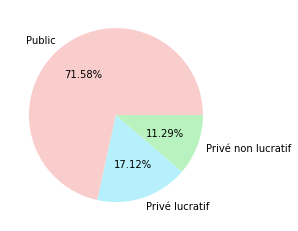

In [83]:
colors = ['#facdcd','#b6f0fc','#b8f2be']
plt.pie(Q22_good["stjr"].value_counts(), labels = labels_names,
           colors = colors,
           autopct = lambda x: str(round(x, 2)) + '%')

 On n'a que 549 établissements lorsque l'on joint les bases ISA et Q22, soit moins de la moitié par rapport à ceux de la base ISA.

In [84]:
ISA[~ISA["Numero_finess"].isin(Q22_good["Numero_finess"])]["Numero_finess"]

0       010008407
1       010009132
6       020000048
7       020000055
9       020000071
          ...    
1171    950300244
1172    950300277
1173    950300301
1174    950300350
1175    950807982
Name: Numero_finess, Length: 613, dtype: object

 Cela est sûrement dû au fait que tous les établissements n'accueillent pas des internes (étudiants). En 
 effet, en se penchant sur la documentation : https://drees.solidarites-sante.gouv.fr/sites/default/files/2021-03/6-8.pdf, 
 On ne trouve pas trop de réponse à nos questions.
 

### C) ISA et la base Q23

#### -  On a plusieurs  problème dans les données, avant même de les joindre avec la base ISA
- le type : certaines lignes de FI et FI_EJ sont en str, d'autres en float : il faut donc les remplacer
- certains établissements de FI_EJ sont codés  avec un .0, comme ci-dessous

 - **le type**

In [85]:
ISA[(ISA.Numero_finess== "920110020")]

,Numero_finess,Points_ISA,stjr
671,920110020,190013.328333,1


In [86]:
Q23[(Q23.FI== "920120011")].head(5)

,BOR,AN,FI,FI_EJ,PERSO,EFFCDI,ETPCDI,EFFCDD,ETPCDD,ETPTIT,EFFTIT,EFFPNM,ETPPNM


In [87]:
Q23[['FI','FI_EJ']] = Q23[['FI','FI_EJ']].astype(str)

In [88]:
Q23[(Q23.FI== "920120011")].head(5)

,BOR,AN,FI,FI_EJ,PERSO,EFFCDI,ETPCDI,EFFCDD,ETPCDD,ETPTIT,EFFTIT,EFFPNM,ETPPNM
70546,Q23,2019,920120011,750821092.0,N1000,NaN,NaN,26.0,26.0,220.91,228.0,254.0,246.91
70547,Q23,2019,920120011,750821092.0,N1100,NaN,NaN,NaN,NaN,13.05,14.0,14.0,13.05
70548,Q23,2019,920120011,750821092.0,N1210,NaN,NaN,1.0,1.0,91.60,95.0,96.0,92.60
70549,Q23,2019,920120011,750821092.0,N1220,NaN,NaN,25.0,25.0,115.26,118.0,143.0,140.26
70550,Q23,2019,920120011,750821092.0,N1400,NaN,NaN,NaN,NaN,1.00,1.0,1.0,1.00


- le cas des  ".0"

In [89]:
Q23[(Q23.FI_EJ== "920110020")].head(5)

,BOR,AN,FI,FI_EJ,PERSO,EFFCDI,ETPCDI,EFFCDD,ETPCDD,ETPTIT,EFFTIT,EFFPNM,ETPPNM


In [90]:
Q23[(Q23.FI_EJ== "920110020.0")].head(5)

,BOR,AN,FI,FI_EJ,PERSO,EFFCDI,ETPCDI,EFFCDD,ETPCDD,ETPTIT,EFFTIT,EFFPNM,ETPPNM
69707,Q23,2019,920000577,920110020.0,N1000,36.0,37.10,26.0,17.51,111.95,111.0,173.0,166.56
69708,Q23,2019,920000577,920110020.0,N1100,0.0,0.53,1.0,0.15,6.53,6.0,7.0,7.21
69709,Q23,2019,920000577,920110020.0,N1210,4.0,4.89,6.0,3.45,20.16,20.0,30.0,28.50
69710,Q23,2019,920000577,920110020.0,N1220,32.0,31.68,19.0,13.91,84.26,84.0,135.0,129.85
69711,Q23,2019,920000577,920110020.0,N1400,0.0,0.00,0.0,0.00,1.00,1.0,1.0,1.00


In [91]:
# On ne garde que les 9 premiers caractères : 
Q23['FI_EJ'] = Q23["FI_EJ"].str[:9]

#### -  merge entre Numero_finess et FI

In [ ]:
Q23_short_fi = Q23[["FI","PERSO","AN"]]
Q23_short_fi.groupby(by=["FI", "PERSO"]).count().sort_values(by="AN")
Q23_group_fi = Q23_short_fi.groupby(by=["FI", "PERSO"]).count().sort_values(by="AN")
Q23_group_fi = Q23_group_fi.rename(columns = {'AN': 'Nb_doublons_fi'})

Q23_group_fi = Q23_group_fi.reset_index()

#On réindexe, pour avoir une colonne avec les identifiants de chaque intervalle, 
#qu'on appelle id_int pour identifiant intervalle
Q23_group_fi['id_fi_perso'] = Q23_group_fi.index
Q23_group_fi.sort_values(by="Nb_doublons_fi")
Q23_group_fi

In [93]:
print("fi : ",Q23_group_fi["id_fi_perso"].size,'\n',"fi uniques :",Q23_group_fi["id_fi_perso"].nunique())
# On remarque qu'il n'y a pas de doublons pour FI

fi :  77320 
 fi uniques : 77320


In [94]:
Q23_fi=pd.merge(ISA, Q23, left_on = ['Numero_finess'], right_on = ['FI'], how='inner')
Q23_fi

,Numero_finess,Points_ISA,stjr,BOR,AN,FI,FI_EJ,PERSO,EFFCDI,ETPCDI,EFFCDD,ETPCDD,ETPTIT,EFFTIT,EFFPNM,ETPPNM
0,060000528,356892.030000,3,Q23,2019,060000528,060780962,N1000,142.0,133.31,7.0,10.04,2.61,2.0,151.0,145.96
1,060000528,356892.030000,3,Q23,2019,060000528,060780962,N1100,4.0,4.09,NaN,NaN,1.00,1.0,5.0,5.09
2,060000528,356892.030000,3,Q23,2019,060000528,060780962,N1210,63.0,56.88,6.0,5.86,NaN,NaN,69.0,62.74
3,060000528,356892.030000,3,Q23,2019,060000528,060780962,N1220,74.0,71.70,1.0,4.18,1.61,1.0,76.0,77.49
4,060000528,356892.030000,3,Q23,2019,060000528,060780962,N1400,1.0,0.64,NaN,NaN,NaN,NaN,1.0,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13975,950807982,177318.826667,2,Q23,2019,950807982,950001636,N4160,2.0,2.00,NaN,NaN,NaN,NaN,2.0,2.00
13976,950807982,177318.826667,2,Q23,2019,950807982,950001636,N5000,6.0,6.00,NaN,NaN,NaN,NaN,6.0,6.00
13977,950807982,177318.826667,2,Q23,2019,950807982,950001636,N511A,4.0,4.00,NaN,NaN,NaN,NaN,4.0,4.00
13978,950807982,177318.826667,2,Q23,2019,950807982,950001636,N5120,2.0,2.00,NaN,NaN,NaN,NaN,2.0,2.00


In [ ]:
Q23_fi[(Q23_fi.FI== "920120011")]

In [96]:
Q23_short_fiej= Q23[["FI_EJ","PERSO","AN"]]

In [97]:
Q23_short_fiej.groupby(by=["FI_EJ", "PERSO"]).count().sort_values(by="AN") 
# On remarque tout de suite que certaines lignes sont des doublons.

AN
FI_EJ     PERSO    
010000156 N1000   1
660000373 N1210   1
          N1220   1
          N2000   1
          N2120   1
...              ..
920030269 N2510  75
          N1100  76
          N2000  76
          N9999  76
          N1000  76

[51128 rows x 1 columns]

In [98]:
Q23_group_fiej = Q23_short_fiej.groupby(by=["FI_EJ", "PERSO"]).count().sort_values(by="AN")
Q23_group_fiej = Q23_group_fiej.rename(columns = {'AN': 'Nb_doublons_fiej'})

Q23_group_fiej = Q23_group_fiej.reset_index()

#On réindexe, pour avoir une colonne avec les identifiants de chaque intervalle, 
#qu'on appelle id_fiej_perso pour identifier intervalle
Q23_group_fiej['id_fiej_perso'] = Q23_group_fiej.index
Q23_group_fiej.sort_values(by="Nb_doublons_fiej")
Q23_group_fiej


,FI_EJ,PERSO,Nb_doublons_fiej,id_fiej_perso
0,010000156,N1000,1,0
1,660000373,N1210,1,1
2,660000373,N1220,1,2
3,660000373,N2000,1,3
4,660000373,N2120,1,4
...,...,...,...,...
51123,920030269,N2510,75,51123
51124,920030269,N1100,76,51124
51125,920030269,N2000,76,51125
51126,920030269,N9999,76,51126


In [99]:
print("On a", Q23_group_fiej[(Q23_group_fiej.Nb_doublons_fiej > 1)].shape[0], "cas où il y plusieurs lignes pour un même type de métier d'un même hôpital")

On a 10233 cas où il y plusieurs lignes pour un même type de métier d'un même hôpital


In [100]:
Q23_id = pd.merge(Q23, Q23_group_fiej, left_on = ["FI_EJ", "PERSO"], right_on = ["FI_EJ", "PERSO"], how="inner")
Q23_id

,BOR,AN,FI,FI_EJ,PERSO,EFFCDI,ETPCDI,EFFCDD,ETPCDD,ETPTIT,EFFTIT,EFFPNM,ETPPNM,Nb_doublons_fiej,id_fiej_perso
0,Q23,2019,010000024,010780054,N1000,17.0,17.34,47.0,31.22,185.41,199.0,263.0,233.97,2,44698
1,Q23,2019,010009314,010780054,N1000,NaN,NaN,NaN,NaN,3.24,5.0,5.0,3.24,2,44698
2,Q23,2019,010000024,010780054,N1100,1.0,1.10,NaN,NaN,5.19,6.0,7.0,6.29,1,29865
3,Q23,2019,010000024,010780054,N1210,NaN,0.17,3.0,3.86,95.56,99.0,102.0,99.59,2,44697
4,Q23,2019,010009314,010780054,N1210,NaN,NaN,NaN,NaN,2.84,3.0,3.0,2.84,2,44697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77315,Q23,2019,980501258,970407250,N5130,NaN,0.57,NaN,NaN,NaN,NaN,NaN,0.57,4,49049
77316,Q23,2019,980500763,970407250,N9999,22.0,13.50,18.0,12.81,NaN,NaN,40.0,26.31,4,49048
77317,Q23,2019,980500920,970407250,N9999,NaN,7.23,NaN,5.23,NaN,NaN,NaN,12.46,4,49048
77318,Q23,2019,980501159,970407250,N9999,NaN,3.30,NaN,0.43,NaN,NaN,NaN,3.73,4,49048


In [101]:
Q23_doublon = Q23_id[(Q23_id.Nb_doublons_fiej > 1)]
Q23_2 = Q23_id[~(Q23_id.Nb_doublons_fiej > 1)]

In [ ]:
#moyenne que pour les doublons, sinon ça prend trop de temps
for i in Q23_doublon['id_fiej_perso'].unique():
    moyenne_EFFCDI = Q23_doublon[Q23_doublon['id_fiej_perso']==i]['EFFCDI'].mean()
    moyenne_ETPCDI = Q23_doublon[Q23_doublon['id_fiej_perso']==i]['ETPCDI'].mean()
    moyenne_EFFCDD = Q23_doublon[Q23_doublon['id_fiej_perso']==i]['EFFCDD'].mean()
    moyenne_ETPCDD = Q23_doublon[Q23_doublon['id_fiej_perso']==i]['ETPCDD'].mean()
    moyenne_ETPTIT = Q23_doublon[Q23_doublon['id_fiej_perso']==i]['ETPTIT'].mean()
    moyenne_EFFTIT = Q23_doublon[Q23_doublon['id_fiej_perso']==i]['EFFTIT'].mean()
    moyenne_EFFPNM = Q23_doublon[Q23_doublon['id_fiej_perso']==i]['EFFPNM'].mean()
    moyenne_ETPPNM = Q23_doublon[Q23_doublon['id_fiej_perso']==i]['ETPPNM'].mean()
    
    Indexs_Q23_doublon = Q23_doublon[Q23_doublon['id_fiej_perso']==i].index
    Q23_doublon['EFFCDI'][Indexs_Q23_doublon] = float(moyenne_EFFCDI)
    Q23_doublon['ETPCDI'][Indexs_Q23_doublon] = float(moyenne_ETPCDI)
    Q23_doublon['EFFCDD'][Indexs_Q23_doublon] = float(moyenne_EFFCDD)
    Q23_doublon['ETPCDD'][Indexs_Q23_doublon] = float(moyenne_ETPCDD)
    Q23_doublon['ETPTIT'][Indexs_Q23_doublon] = float(moyenne_ETPTIT)
    Q23_doublon['EFFTIT'][Indexs_Q23_doublon] = float(moyenne_EFFTIT)
    Q23_doublon['EFFPNM'][Indexs_Q23_doublon] = float(moyenne_EFFPNM)
    Q23_doublon['ETPPNM'][Indexs_Q23_doublon] = float(moyenne_ETPPNM)
    
Q23_doublon.head(10)

In [103]:
Q23_fiej_tot = pd.concat([Q23_doublon, Q23_2])

In [104]:
#On garde la première ligne
df_Q23_fiej = pd.DataFrame(Q23_fiej_tot)
df_Q23_fiej.drop_duplicates(subset= "id_fiej_perso", keep = 'first', inplace=True)

In [105]:
Q23_fiej =pd.merge(ISA, df_Q23_fiej, left_on = ['Numero_finess'], right_on = ['FI_EJ'],how='inner')
Q23_fiej

,Numero_finess,Points_ISA,stjr,BOR,AN,FI,FI_EJ,PERSO,EFFCDI,ETPCDI,EFFCDD,ETPCDD,ETPTIT,EFFTIT,EFFPNM,ETPPNM,Nb_doublons_fiej,id_fiej_perso
0,010008407,1.650548e+05,1,Q23,2019,010005239,010008407,N1000,1.000000,1.153333,4.666667,3.650000,16.393333,17.666667,23.333333,21.196667,3,47048
1,010008407,1.650548e+05,1,Q23,2019,010005239,010008407,N1210,0.000000,0.000000,0.000000,0.000000,7.955000,8.000000,8.000000,7.955000,2,44861
2,010008407,1.650548e+05,1,Q23,2019,010005239,010008407,N1220,1.000000,1.153333,7.000000,3.650000,10.156667,11.666667,17.333333,14.960000,3,47061
3,010008407,1.650548e+05,1,Q23,2019,010005239,010008407,N2000,1.333333,1.826667,14.666667,12.946667,82.550000,94.666667,110.666667,97.323333,3,47053
4,010008407,1.650548e+05,1,Q23,2019,010005239,010008407,N2120,0.000000,0.000000,0.000000,0.043333,2.443333,3.000000,3.000000,2.486667,3,47113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16251,950110080,1.204192e+06,1,Q23,2019,950000364,950110080,N5110,21.000000,18.730000,NaN,0.500000,2.980000,3.000000,24.000000,22.210000,1,16265
16252,950110080,1.204192e+06,1,Q23,2019,950000364,950110080,N511A,19.000000,18.900000,11.000000,10.330000,7.970000,10.000000,40.000000,37.200000,1,16257
16253,950110080,1.204192e+06,1,Q23,2019,950000364,950110080,N5130,19.000000,13.930000,22.000000,25.460000,126.530000,123.000000,164.000000,165.920000,1,16258
16254,950110080,1.204192e+06,1,Q23,2019,950000364,950110080,N5140,4.000000,4.000000,3.000000,2.740000,13.090000,13.000000,20.000000,19.830000,1,16259


In [106]:
Q23_good= pd.concat([Q23_fiej, Q23_fi] )
Q23_good

,Numero_finess,Points_ISA,stjr,BOR,AN,FI,FI_EJ,PERSO,EFFCDI,ETPCDI,EFFCDD,ETPCDD,ETPTIT,EFFTIT,EFFPNM,ETPPNM,Nb_doublons_fiej,id_fiej_perso
0,010008407,165054.798333,1,Q23,2019,010005239,010008407,N1000,1.000000,1.153333,4.666667,3.650000,16.393333,17.666667,23.333333,21.196667,3.0,47048.0
1,010008407,165054.798333,1,Q23,2019,010005239,010008407,N1210,0.000000,0.000000,0.000000,0.000000,7.955000,8.000000,8.000000,7.955000,2.0,44861.0
2,010008407,165054.798333,1,Q23,2019,010005239,010008407,N1220,1.000000,1.153333,7.000000,3.650000,10.156667,11.666667,17.333333,14.960000,3.0,47061.0
3,010008407,165054.798333,1,Q23,2019,010005239,010008407,N2000,1.333333,1.826667,14.666667,12.946667,82.550000,94.666667,110.666667,97.323333,3.0,47053.0
4,010008407,165054.798333,1,Q23,2019,010005239,010008407,N2120,0.000000,0.000000,0.000000,0.043333,2.443333,3.000000,3.000000,2.486667,3.0,47113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13975,950807982,177318.826667,2,Q23,2019,950807982,950001636,N4160,2.000000,2.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN
13976,950807982,177318.826667,2,Q23,2019,950807982,950001636,N5000,6.000000,6.000000,NaN,NaN,NaN,NaN,6.000000,6.000000,NaN,NaN
13977,950807982,177318.826667,2,Q23,2019,950807982,950001636,N511A,4.000000,4.000000,NaN,NaN,NaN,NaN,4.000000,4.000000,NaN,NaN
13978,950807982,177318.826667,2,Q23,2019,950807982,950001636,N5120,2.000000,2.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN


In [107]:
print("Il nous manque", ISA[~ISA["Numero_finess"].isin(Q23_good["Numero_finess"])]["Numero_finess"].shape[0], "établissements.")

Il nous manque 7 établissements.


In [108]:
ISA[~ISA["Numero_finess"].isin(Q23_good["Numero_finess"])].head(55)

,Numero_finess,Points_ISA,stjr
339,520004680,126991.370000,3
340,520004714,77375.870000,3
375,560029068,129285.330000,3
479,670020098,9344.040000,3
632,840019053,2536.030000,3
884,440000651,6613.990000,2
886,440024982,31024.516667,2


In [109]:
ISA[~ISA["Numero_finess"].isin(Q21_good["Numero_finess"])].head(55)

,Numero_finess,Points_ISA,stjr
339,520004680,126991.370000,3
340,520004714,77375.870000,3
375,560029068,129285.330000,3
479,670020098,9344.040000,3
632,840019053,2536.030000,3
734,100000157,4551.390000,2
831,330780255,22251.530000,2
884,440000651,6613.990000,2
886,440024982,31024.516667,2
1075,780300364,14503.930000,2


In [110]:
#On supprime ces établissements de Q20_good :
Q23_good = Q23_good[(Q23_good.Numero_finess != "670020098")]
Q23_good = Q23_good[(Q23_good.Numero_finess != "100000157")]
Q23_good = Q23_good[(Q23_good.Numero_finess != "330780255")]
Q23_good = Q23_good[(Q23_good.Numero_finess != "440000651")]
Q23_good = Q23_good[(Q23_good.Numero_finess != "440024982")]
Q23_good = Q23_good[(Q23_good.Numero_finess != "780300364")]

#En plus on enlève de nouvelles bases : 
Q23_good = Q23_good[(Q23_good.Numero_finess != "520004680")]
Q23_good = Q23_good[(Q23_good.Numero_finess != "520004714")]
Q23_good = Q23_good[(Q23_good.Numero_finess != "560029068")]
Q23_good = Q23_good[(Q23_good.Numero_finess != "840019053")]


Après vérification, aucun de ces établissements n'est dans la base Q23 de la SAE

### 2) Transformation des effectifs des libéraux en ETP

In [111]:
Q20_good.columns

Index(['Numero_finess', 'Points_ISA', 'stjr', 'BOR', 'AN', 'FI', 'FI_EJ',
       'PERSO', 'EFFSALPLH', 'EFFSALPLF', 'EFFSALPAH', 'EFFSALPAF',
       'EFFLIBPLH', 'EFFLIBPLF', 'EFFLIBPAH', 'EFFLIBPAF', 'ETPSALH',
       'ETPSALF', 'ETP_PU', 'ETP_PH', 'ETP_AS', 'ETP_HU', 'ETP_AT', 'ETP_AU',
       'EFFSAL', 'ETPSAL', 'EFFLIB', 'Nb_doublons_fiej', 'id_fiej_perso'],
      dtype='object')

In [112]:
Q21_good.columns

Index(['Numero_finess', 'Points_ISA', 'stjr', 'BOR', 'AN', 'FI', 'FI_EJ',
       'DISCI', 'ETP_SAL', 'ETP_HU', 'ETP_MAD', 'ETP_INT', 'EFF_LIB',
       'Nb_doublons_fiej', 'id_fiej_perso'],
      dtype='object')

In [113]:
Q23_good.columns

Index(['Numero_finess', 'Points_ISA', 'stjr', 'BOR', 'AN', 'FI', 'FI_EJ',
       'PERSO', 'EFFCDI', 'ETPCDI', 'EFFCDD', 'ETPCDD', 'ETPTIT', 'EFFTIT',
       'EFFPNM', 'ETPPNM', 'Nb_doublons_fiej', 'id_fiej_perso'],
      dtype='object')

In [114]:
#On ne garde que quelques colonnes, pour mieux joindre les bases de données après
Q20_good = Q20_good[["Numero_finess","PERSO","ETPSAL","EFFLIB"]]
Q20_good = Q20_good[Q20_good['PERSO'] != "M9999"] #On supprime la catégorie "total", qui regroupe l'ensemble du personnel médical
Q21_good = Q21_good[["Numero_finess","ETP_INT"]]
#Q22_good = Q22_good[["Numero_finess","INTTOT"]] => plus très utile si on a Q21
Q23_good = Q23_good[["Numero_finess","PERSO","ETPPNM"]]
Q23_good = Q23_good[Q23_good['PERSO'] != "N9999"]
ISA = ISA[["Numero_finess","Points_ISA","stjr"]]

In [115]:
#On impute une valeur pour les libéraux
Q20_good["ETPLIB"]= Q20_good["EFFLIB"]*0.5
Q20_good =Q20_good[["Numero_finess","PERSO","ETPSAL","ETPLIB"]]

In [116]:
Q20_good.groupby("Numero_finess").sum()

,ETPSAL,ETPLIB
Numero_finess,,
010007300,0.000,7.5
010008407,32.820,0.0
010009132,1.865,0.0
010780054,147.130,5.5
010780062,29.550,0.0
...,...,...
950300277,7.060,45.5
950300301,8.770,2.5
950300350,1.800,12.0


### 2) Regroupement des bases en un unique dataframe

On souhaite vérifier que les hopitaux contenus Q22 et Q23 sont également dans Q20, et sinon regarder plus précisément de quel établissement il s'agit.

#### A) Traitement des trois Q20_good, Q22_good, Q23_good avant le merge

- **Q20_good**

On souhaite que la colonne *PERSO* soit verticale, pour pouvoir avoir toutes les informations d'un établissement sur la même ligne

In [ ]:
Q20_good_pivot = Q20_good.pivot_table(index='Numero_finess', columns='PERSO', values=['ETPLIB', 'ETPSAL'])
Q20_good_pivot

In [118]:
Q21_good = Q21_good.groupby("Numero_finess").sum()

- **Q23_good**

In [119]:
Q23_good_pivot = Q23_good.pivot_table(index='Numero_finess', columns='PERSO', values=['ETPPNM'])
Q23_good_pivot

ETPPNM                                                \
PERSO               N1000 N1100   N1210   N1220 N1300 N1400       N2000   
Numero_finess                                                             
010007300        2.250000  1.00   1.250     NaN   NaN   NaN    4.200000   
010008407       21.196667  2.00   7.955  14.960   NaN   0.8   97.323333   
010009132        4.175000  0.41   1.010   2.755   NaN   NaN   46.700000   
010780054      118.605000  6.29  51.215  63.745   NaN   1.0  388.590000   
010780062       58.450000  2.00   9.660  46.790   NaN   NaN  336.540000   
...                   ...   ...     ...     ...   ...   ...         ...   
950300277       74.950000  8.59  27.370  37.990   NaN   1.0  246.990000   
950300301       22.560000  2.90   7.530  11.130   NaN   1.0  103.560000   
950300350        6.600000   NaN   3.000   3.600   NaN   NaN   27.550000   
950630012       23.070000  2.00   5.000  15.070   NaN   1.0  177.880000   
950807982       61.000000  3.17   5.910  51.920   NaN   NaN  288.230000   

                                            ...                          \
PERSO              N2120 N2130       N2210  ... N4160 N4170 N4180 N4190   
Numero_finess                               ...                           
010007300            NaN   NaN    3.100000  ...   NaN   NaN   NaN   NaN   
010008407       2.486667   NaN   33.196667  ...  1.67   NaN   NaN   NaN   
010009132       2.775000   NaN   10.420000  ...   NaN   NaN   NaN   NaN   
010780054      12.223333   NaN  153.616667  ...  5.41   NaN   2.0   NaN   
010780062      13.680000   0.4  105.430000  ...  2.00   NaN   NaN   NaN   
...                  ...   ...         ...  ...   ...   ...   ...   ...   
950300277       8.000000   NaN   97.300000  ...   NaN   NaN   NaN   NaN   
950300301       4.700000   NaN   34.230000  ...   NaN   NaN   NaN   NaN   
950300350       1.000000   NaN   17.050000  ...   NaN   NaN   NaN   NaN   
950630012       9.800000   1.0   60.570000  ...   NaN   NaN   NaN   NaN   
950807982       7.950000   4.0  145.120000  ...  2.00   NaN   NaN   NaN   

                                                           
PERSO            N5000  N5110  N511A N5120   N5130  N5140  
Numero_finess                                              
010007300          NaN    NaN    NaN   NaN     NaN    NaN  
010008407       26.440   2.00   6.12   NaN  21.355   2.05  
010009132       13.465   1.00   2.36   NaN  10.105    NaN  
010780054      112.630  10.00  32.07  4.57  83.530  11.56  
010780062       57.570   5.36   6.00   NaN  40.060   6.15  
...                ...    ...    ...   ...     ...    ...  
950300277       14.460    NaN   2.81  1.00  10.650    NaN  
950300301        3.000    NaN   3.00   NaN     NaN    NaN  
950300350        1.000    NaN   1.00   NaN     NaN    NaN  
950630012       12.700    NaN   2.00  1.00   8.700   1.00  
950807982        6.000    NaN   4.00  2.00     NaN    NaN  

[1152 rows x 52 columns]

#### 2) On merge nos données pour obtenir une unique base : 

- **la base complète**

In [120]:
# On merge d'abord ceux avec un pivot
result1 = pd.merge(Q20_good_pivot, Q23_good_pivot, on="Numero_finess", how ="outer")

# Puis on ajoute ISA pour avoir les points ISA
result2 = pd.merge(result1, ISA, on="Numero_finess" )

C:\Users\Vinciane\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [121]:
#On ajoute les internes
VAR_EXPL = pd.merge(result2, Q21_good, on=["Numero_finess"], how= "outer" )
VAR_EXPL

,Numero_finess,"(ETPLIB, M1010)","(ETPLIB, M1020)","(ETPLIB, M1030)","(ETPLIB, M1031)","(ETPLIB, M1040)","(ETPLIB, M1050)","(ETPLIB, M1070)","(ETPLIB, M1090)","(ETPLIB, M1100)",...,"(ETPPNM, N4190)","(ETPPNM, N5000)","(ETPPNM, N5110)","(ETPPNM, N511A)","(ETPPNM, N5120)","(ETPPNM, N5130)","(ETPPNM, N5140)",Points_ISA,stjr,ETP_INT
0,010007300,NaN,NaN,3.0,NaN,0.5,NaN,NaN,0.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3785.960000,2,0.00
1,010008407,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,26.440,2.00,6.12,NaN,21.355,2.05,165054.798333,1,0.00
2,010009132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.465,1.00,2.36,NaN,10.105,NaN,5715.170000,1,0.00
3,010780054,3.5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,112.630,10.00,32.07,4.57,83.530,11.56,787929.068333,1,195.09
4,010780062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,57.570,5.36,6.00,NaN,40.060,6.15,188174.950000,1,6.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,950300277,NaN,1.0,3.0,NaN,5.0,0.5,1.0,3.0,NaN,...,NaN,14.460,NaN,2.81,1.00,10.650,NaN,140779.191667,2,0.00
1148,950300301,NaN,NaN,NaN,NaN,1.0,NaN,0.5,NaN,NaN,...,NaN,3.000,NaN,3.00,NaN,NaN,NaN,6779.931667,2,0.00
1149,950300350,NaN,NaN,0.5,NaN,1.5,NaN,NaN,0.5,NaN,...,NaN,1.000,NaN,1.00,NaN,NaN,NaN,11099.390000,2,0.00
1150,950630012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.700,NaN,2.00,1.00,8.700,1.00,20931.220000,3,2.49


In [ ]:
VAR_EXPL.head(50)

In [123]:
VAR_EXPL.groupby(by="Numero_finess").sum()

,"(ETPLIB, M1010)","(ETPLIB, M1020)","(ETPLIB, M1030)","(ETPLIB, M1031)","(ETPLIB, M1040)","(ETPLIB, M1050)","(ETPLIB, M1070)","(ETPLIB, M1090)","(ETPLIB, M1100)","(ETPLIB, M1110)",...,"(ETPPNM, N4190)","(ETPPNM, N5000)","(ETPPNM, N5110)","(ETPPNM, N511A)","(ETPPNM, N5120)","(ETPPNM, N5130)","(ETPPNM, N5140)",Points_ISA,stjr,ETP_INT
Numero_finess,,,,,,,,,,,,,,,,,,,,,
010007300,0.0,0.0,3.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,3785.960000,2,0.00
010008407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,26.440,2.00,6.12,0.00,21.355,2.05,165054.798333,1,0.00
010009132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,13.465,1.00,2.36,0.00,10.105,0.00,5715.170000,1,0.00
010780054,3.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,112.630,10.00,32.07,4.57,83.530,11.56,787929.068333,1,195.09
010780062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,57.570,5.36,6.00,0.00,40.060,6.15,188174.950000,1,6.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950300277,0.0,1.0,3.0,0.0,5.0,0.5,1.0,3.0,0.0,3.0,...,0.0,14.460,0.00,2.81,1.00,10.650,0.00,140779.191667,2,0.00
950300301,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,...,0.0,3.000,0.00,3.00,0.00,0.000,0.00,6779.931667,2,0.00
950300350,0.0,0.0,0.5,0.0,1.5,0.0,0.0,0.5,0.0,1.5,...,0.0,1.000,0.00,1.00,0.00,0.000,0.00,11099.390000,2,0.00


In [124]:
VAR_EXPL.sum(axis=0)

Numero_finess      0100073000100084070100091320107800540107800620...
(ETPLIB, M1010)                                                456.5
(ETPLIB, M1020)                                                441.0
(ETPLIB, M1030)                                          1955.333333
(ETPLIB, M1031)                                                 71.5
                                         ...                        
(ETPPNM, N5130)                                         33197.545217
(ETPPNM, N5140)                                          2530.849099
Points_ISA                                          341193600.356667
stjr                                                            1959
ETP_INT                                                 42686.031113
Length: 148, dtype: object

On passe de 1388 lignes à 1165, alors que dès le premier merge, on devrait avoir le nombre de lignes de Q20_good, soit 1165.
On cherche à quoi c'est dû : 


- **la base par catégorie**

Dans la base Q20, trois catégories semblent se distinguer 
    - M1000 Médecine (Médecine, Neurologie, Anesthésie, Pédiatrie...)
    - M2000 Chirurgie, Ophtamologies, Gynécologie, Oto-Rhino-laryngologie
    - M3000 Autres métiers médicaux (Pharmacie, Psychiatrie, Odontologie...)

In [125]:
Q20_good_red = Q20_good.copy()
Q20_good_red['PERSO'].loc[Q20_good_red['PERSO'].astype(str).str.startswith('M1')] = "M1000"
Q20_good_red['PERSO'].loc[Q20_good_red['PERSO'].astype(str).str.startswith('M2')] = "M2000"
Q20_good_red['PERSO'].loc[Q20_good_red['PERSO'].astype(str).str.startswith('M3')] = "M2000"

C:\Users\Vinciane\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [126]:
Q20_good_red

,Numero_finess,PERSO,ETPSAL,ETPLIB
0,010008407,M1000,5.26,0.0
1,010008407,M2000,0.95,0.0
3,010008407,M1000,5.33,0.0
4,010008407,M1000,0.60,0.0
5,010008407,M1000,1.50,0.0
...,...,...,...,...
11005,950807982,M2000,NaN,0.5
11006,950807982,M2000,NaN,3.0
11007,950807982,M2000,NaN,0.5
11008,950807982,M2000,1.00,NaN


In [127]:
Q20_good_red =  Q20_good_red.groupby(by=['Numero_finess','PERSO']).sum()

In [128]:
Q20_good_red_pivot = Q20_good_red.pivot_table(index='Numero_finess', columns='PERSO', values=['ETPSAL', 'ETPLIB'])
Q20_good_red_pivot

ETPLIB         ETPSAL       
PERSO          M1000 M2000    M1000  M2000
Numero_finess                             
010007300        4.5   3.0    0.000   0.00
010008407        0.0   0.0   18.490  14.33
010009132        0.0   0.0    1.795   0.07
010780054        4.5   1.0  102.600  44.53
010780062        0.0   0.0   19.450  10.10
...              ...   ...      ...    ...
950300277       29.5  16.0    4.060   3.00
950300301        2.0   0.5    6.970   1.80
950300350        5.5   6.5    1.000   0.80
950630012        0.0   0.0   11.300   2.50
950807982       33.0  38.5    1.300   3.00

[1152 rows x 4 columns]

In [129]:
#On réduit Q23_good pour ne conserver que les secteurs d'activités pour les métiers et pas chaque métier individuellement
Q23_good_red = Q23_good[Q23_good['PERSO'].isin(['N1000','N2000', 'N3000','N4000', 'N5000'])]
Q23_good_red_pivot = Q23_good_red.pivot_table(index='Numero_finess', columns='PERSO', values=['ETPPNM'])

In [130]:
Q23_good_red_pivot 

ETPPNM                                            
PERSO               N1000       N2000      N3000       N4000    N5000
Numero_finess                                                        
010007300        2.250000    4.200000        NaN         NaN      NaN
010008407       21.196667   97.323333   0.846667    9.206667   26.440
010009132        4.175000   46.700000   1.065000    1.130000   13.465
010780054      118.605000  388.590000   4.930000  107.660000  112.630
010780062       58.450000  336.540000   5.450000   29.320000   57.570
...                   ...         ...        ...         ...      ...
950300277       74.950000  246.990000   1.100000    6.460000   14.460
950300301       22.560000  103.560000   1.380000    2.940000    3.000
950300350        6.600000   27.550000        NaN    3.000000    1.000
950630012       23.070000  177.880000  39.070000    5.330000   12.700
950807982       61.000000  288.230000   1.130000    7.690000    6.000

[1152 rows x 5 columns]

In [131]:
# On merge les bases avec des pivots
result1_red = pd.merge(Q20_good_red_pivot, Q23_good_red_pivot, on="Numero_finess")

# Puis on ajoute ISA pour avoir les points ISA
result2_red = pd.merge(result1_red, ISA, on="Numero_finess" )

C:\Users\Vinciane\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [132]:
result2_red

,Numero_finess,"(ETPLIB, M1000)","(ETPLIB, M2000)","(ETPSAL, M1000)","(ETPSAL, M2000)","(ETPPNM, N1000)","(ETPPNM, N2000)","(ETPPNM, N3000)","(ETPPNM, N4000)","(ETPPNM, N5000)",Points_ISA,stjr
0,010007300,4.5,3.0,0.000,0.00,2.250000,4.200000,NaN,NaN,NaN,3785.960000,2
1,010008407,0.0,0.0,18.490,14.33,21.196667,97.323333,0.846667,9.206667,26.440,165054.798333,1
2,010009132,0.0,0.0,1.795,0.07,4.175000,46.700000,1.065000,1.130000,13.465,5715.170000,1
3,010780054,4.5,1.0,102.600,44.53,118.605000,388.590000,4.930000,107.660000,112.630,787929.068333,1
4,010780062,0.0,0.0,19.450,10.10,58.450000,336.540000,5.450000,29.320000,57.570,188174.950000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,950300277,29.5,16.0,4.060,3.00,74.950000,246.990000,1.100000,6.460000,14.460,140779.191667,2
1148,950300301,2.0,0.5,6.970,1.80,22.560000,103.560000,1.380000,2.940000,3.000,6779.931667,2
1149,950300350,5.5,6.5,1.000,0.80,6.600000,27.550000,NaN,3.000000,1.000,11099.390000,2
1150,950630012,0.0,0.0,11.300,2.50,23.070000,177.880000,39.070000,5.330000,12.700,20931.220000,3


## - répartition du personnel

In [133]:
VAR_EXPL_CAT = pd.merge(result2_red, Q21_good, on=["Numero_finess"] )

VAR_EXPL_CAT = VAR_EXPL_CAT.rename(columns = {
    ('ETPLIB', 'M1000') : 'Médecins libéraux',  
    ('ETPLIB', 'M2000') : "Autres personnels médicaux libéraux",
    ('ETPSAL', 'M1000') : "Médecins salariés", 
    ('ETPSAL', 'M2000') : "Autres personnels médicaux salariés", 
    ('ETPPNM', 'N1000') : "Personnels de direction et administratifs",
    ('ETPPNM', 'N2000') : "Personnels des services de soins", 
    ('ETPPNM', 'N3000') : "Personnels éducatifs et sociaux",
    ('ETPPNM', 'N4000'): "Personnels médico-techniques",
    ('ETPPNM', 'N5000'): "Personnels techniques et ouvriers",
    "ETP_INT": "Internes"})
   # '(ETPLIB,M1000)': 'Médecins libéraux', '(ETPLIB, M2000)' : 'Autre personnel médical libéral', '(ETPSAL, )' })VAR_EXPL_CAT

In [134]:
VAR_EXPL_CAT['Personnel médical'] = VAR_EXPL_CAT['Médecins libéraux'] + VAR_EXPL_CAT['Médecins salariés'] + VAR_EXPL_CAT["Autres personnels médicaux libéraux"]+ VAR_EXPL_CAT["Autres personnels médicaux salariés"]
VAR_EXPL_CAT['Personnel médical si LIB=0.1'] = VAR_EXPL_CAT['Médecins libéraux']/5 + VAR_EXPL_CAT['Médecins salariés'] + VAR_EXPL_CAT["Autres personnels médicaux libéraux"]/5+ VAR_EXPL_CAT["Autres personnels médicaux salariés"]
VAR_EXPL_CAT['Personnel médical si LIB=0.9'] = VAR_EXPL_CAT['Médecins libéraux']/5*9 + VAR_EXPL_CAT['Médecins salariés'] + VAR_EXPL_CAT["Autres personnels médicaux libéraux"]/5*9+ VAR_EXPL_CAT["Autres personnels médicaux salariés"]

In [135]:
VAR_EXPL_CAT.to_csv(r'D:/Données/ENSAE/2A/Stat_App/VAR_EXPL_CAT.csv')

In [136]:
VAR_EXPL_CAT

,Numero_finess,Médecins libéraux,Autres personnels médicaux libéraux,Médecins salariés,Autres personnels médicaux salariés,Personnels de direction et administratifs,Personnels des services de soins,Personnels éducatifs et sociaux,Personnels médico-techniques,Personnels techniques et ouvriers,Points_ISA,stjr,Internes,Personnel médical,Personnel médical si LIB=0.1,Personnel médical si LIB=0.9
0,010007300,4.5,3.0,0.000,0.00,2.250000,4.200000,NaN,NaN,NaN,3785.960000,2,0.00,7.500,1.500,13.500
1,010008407,0.0,0.0,18.490,14.33,21.196667,97.323333,0.846667,9.206667,26.440,165054.798333,1,0.00,32.820,32.820,32.820
2,010009132,0.0,0.0,1.795,0.07,4.175000,46.700000,1.065000,1.130000,13.465,5715.170000,1,0.00,1.865,1.865,1.865
3,010780054,4.5,1.0,102.600,44.53,118.605000,388.590000,4.930000,107.660000,112.630,787929.068333,1,195.09,152.630,148.230,157.030
4,010780062,0.0,0.0,19.450,10.10,58.450000,336.540000,5.450000,29.320000,57.570,188174.950000,1,6.45,29.550,29.550,29.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,950300277,29.5,16.0,4.060,3.00,74.950000,246.990000,1.100000,6.460000,14.460,140779.191667,2,0.00,52.560,16.160,88.960
1148,950300301,2.0,0.5,6.970,1.80,22.560000,103.560000,1.380000,2.940000,3.000,6779.931667,2,0.00,11.270,9.270,13.270
1149,950300350,5.5,6.5,1.000,0.80,6.600000,27.550000,NaN,3.000000,1.000,11099.390000,2,0.00,13.800,4.200,23.400
1150,950630012,0.0,0.0,11.300,2.50,23.070000,177.880000,39.070000,5.330000,12.700,20931.220000,3,2.49,13.800,13.800,13.800


In [137]:
#On effectue une transformaton
df_translog = VAR_EXPL_CAT.copy()

df_translog['Personnel médical'] = df_translog['Médecins libéraux'] + df_translog['Médecins salariés'] + df_translog["Autres personnels médicaux libéraux"]+ df_translog["Autres personnels médicaux salariés"]

df_translog["Autre sans internes"] = df_translog['Personnels de direction et administratifs']  + df_translog["Personnels éducatifs et sociaux"] + df_translog["Personnels médico-techniques"] + df_translog["Personnels techniques et ouvriers"]

df_translog["Autre sans direction et administratif"] = df_translog["Personnels éducatifs et sociaux"] + df_translog["Personnels médico-techniques"] + df_translog["Personnels techniques et ouvriers"] + df_translog["Internes"]

df_translog["Autre sans techniques et ouvriers"] = df_translog['Personnels de direction et administratifs'] + df_translog["Personnels éducatifs et sociaux"] + df_translog["Personnels médico-techniques"] +df_translog["Internes"]




In [138]:
df_translog.columns

Index(['Numero_finess', 'Médecins libéraux',
       'Autres personnels médicaux libéraux', 'Médecins salariés',
       'Autres personnels médicaux salariés',
       'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers',
       'Points_ISA', 'stjr', 'Internes', 'Personnel médical',
       'Personnel médical si LIB=0.1', 'Personnel médical si LIB=0.9',
       'Autre sans internes', 'Autre sans direction et administratif',
       'Autre sans techniques et ouvriers'],
      dtype='object')

In [139]:
df_translog = df_translog[["Numero_finess","stjr", "Points_ISA", "Personnel médical","Internes",
                           'Personnels de direction et administratifs',"Personnels techniques et ouvriers",
                           "Autre sans internes","Autre sans direction et administratif",
                           "Autre sans techniques et ouvriers"]]

In [140]:
df_translog

,Numero_finess,stjr,Points_ISA,Personnel médical,Internes,Personnels de direction et administratifs,Personnels techniques et ouvriers,Autre sans internes,Autre sans direction et administratif,Autre sans techniques et ouvriers
0,010007300,2,3785.960000,7.500,0.00,2.250000,NaN,NaN,NaN,NaN
1,010008407,1,165054.798333,32.820,0.00,21.196667,26.440,57.690,36.493333,31.250
2,010009132,1,5715.170000,1.865,0.00,4.175000,13.465,19.835,15.660000,6.370
3,010780054,1,787929.068333,152.630,195.09,118.605000,112.630,343.825,420.310000,426.285
4,010780062,1,188174.950000,29.550,6.45,58.450000,57.570,150.790,98.790000,99.670
...,...,...,...,...,...,...,...,...,...,...
1147,950300277,2,140779.191667,52.560,0.00,74.950000,14.460,96.970,22.020000,82.510
1148,950300301,2,6779.931667,11.270,0.00,22.560000,3.000,29.880,7.320000,26.880
1149,950300350,2,11099.390000,13.800,0.00,6.600000,1.000,NaN,NaN,NaN
1150,950630012,3,20931.220000,13.800,2.49,23.070000,12.700,80.170,59.590000,69.960


In [141]:
df_translog.groupby(by="stjr").count()

,Numero_finess,Points_ISA,Personnel médical,Internes,Personnels de direction et administratifs,Personnels techniques et ouvriers,Autre sans internes,Autre sans direction et administratif,Autre sans techniques et ouvriers
stjr,,,,,,,,,
1,518,518,505,518,517,517,491,491,491
2,461,461,449,461,461,424,215,215,224
3,173,173,166,173,169,165,139,140,142


In [142]:
groups = df_translog.groupby(df_translog.stjr)
stjr_1 = groups.get_group(1)
stjr_2 =groups.get_group(2)
stjr_3 =groups.get_group(3)

In [143]:
stjr_1.to_csv(r'D:/Données/ENSAE/2A/Stat_App/stjr_1.csv')
stjr_2.to_csv(r'D:/Données/ENSAE/2A/Stat_App/stjr_2.csv')
stjr_3.to_csv(r'D:/Données/ENSAE/2A/Stat_App/stjr_3.csv')
df_translog.to_csv(r'D:/Données/ENSAE/2A/Stat_App/df_translog.csv')

In [144]:
stjr_3

,Numero_finess,stjr,Points_ISA,Personnel médical,Internes,Personnels de direction et administratifs,Personnels techniques et ouvriers,Autre sans internes,Autre sans direction et administratif,Autre sans techniques et ouvriers
34,060000528,3,3.568920e+05,91.13,92.01,145.96,39.34,354.97,301.02,407.64
37,060780491,3,3.724104e+05,65.17,0.00,36.71,5.25,48.75,12.04,43.50
44,060780947,3,1.745525e+05,72.90,108.12,112.36,19.21,155.46,151.22,244.37
51,060791811,3,1.464326e+05,27.97,18.99,45.63,40.89,97.60,70.96,75.70
52,060794013,3,2.381733e+05,44.67,12.00,32.94,4.36,44.57,23.63,52.21
...,...,...,...,...,...,...,...,...,...,...
1117,940000649,3,5.507680e+05,126.37,132.00,132.30,25.76,221.64,221.34,327.88
1118,940000656,3,3.838428e+04,10.46,1.47,39.47,51.49,94.54,56.54,44.52
1119,940000664,3,1.011017e+06,281.66,402.00,459.58,126.77,1000.58,943.00,1275.81
1135,950000406,3,2.210511e+04,4.77,0.00,13.95,2.36,23.87,9.92,21.51


## Joli graphiques pour les annexes

En tout on a 1154 établissements, soit autant que dans Q20.

In [145]:
SUM_VAR_EXPL_CAT = pd.DataFrame({'sum_tot': VAR_EXPL_CAT.sum()}).transpose()
SUM_VAR_EXPL_CAT = SUM_VAR_EXPL_CAT.drop(["Numero_finess","Points_ISA","stjr"], axis=1)
SUM_VAR_EXPL_CAT

,Médecins libéraux,Autres personnels médicaux libéraux,Médecins salariés,Autres personnels médicaux salariés,Personnels de direction et administratifs,Personnels des services de soins,Personnels éducatifs et sociaux,Personnels médico-techniques,Personnels techniques et ouvriers,Internes,Personnel médical,Personnel médical si LIB=0.1,Personnel médical si LIB=0.9
sum_tot,10336.833333,7833.5,32341.372095,18037.47697,62229.988009,301926.253397,4531.267966,28796.780515,45792.815035,42686.031113,68399.342399,53911.875732,82886.809065


In [146]:
SUM_VAR_EXPL_CAT = SUM_VAR_EXPL_CAT.transpose()
SUM_VAR_EXPL_CAT.reset_index()
SUM_VAR_EXPL_CAT


,sum_tot
Médecins libéraux,10336.833333
Autres personnels médicaux libéraux,7833.5
Médecins salariés,32341.372095
Autres personnels médicaux salariés,18037.47697
Personnels de direction et administratifs,62229.988009
Personnels des services de soins,301926.253397
Personnels éducatifs et sociaux,4531.267966
Personnels médico-techniques,28796.780515
Personnels techniques et ouvriers,45792.815035
Internes,42686.031113


<BarContainer object of 13 artists>

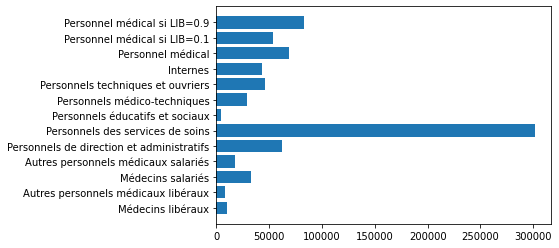

In [147]:
# Create horizontal bars
plt.barh(y =SUM_VAR_EXPL_CAT.index,  width = SUM_VAR_EXPL_CAT.sum_tot)
 

## Analyse des services de soin : les métiers avec le plus d'effectifs

In [148]:
VAR_EXPL.columns

Index([    'Numero_finess', ('ETPLIB', 'M1010'), ('ETPLIB', 'M1020'),
       ('ETPLIB', 'M1030'), ('ETPLIB', 'M1031'), ('ETPLIB', 'M1040'),
       ('ETPLIB', 'M1050'), ('ETPLIB', 'M1070'), ('ETPLIB', 'M1090'),
       ('ETPLIB', 'M1100'),
       ...
       ('ETPPNM', 'N4190'), ('ETPPNM', 'N5000'), ('ETPPNM', 'N5110'),
       ('ETPPNM', 'N511A'), ('ETPPNM', 'N5120'), ('ETPPNM', 'N5130'),
       ('ETPPNM', 'N5140'),        'Points_ISA',              'stjr',
                 'ETP_INT'],
      dtype='object', length=148)

In [149]:
SERV_SOINS = VAR_EXPL[[('ETPPNM', 'N2120'), 
                    ('ETPPNM', 'N2130'),
                    ('ETPPNM', 'N2210'),
                    ('ETPPNM', 'N2220'),
                    ('ETPPNM', 'N2310'),
                    ('ETPPNM', 'N2320'),
                    ('ETPPNM', 'N2340'),
                    ('ETPPNM', 'N2350'),
                    ('ETPPNM', 'N2410'),
                    ('ETPPNM', 'N2420'),
                    ('ETPPNM', 'N2430'),
                    ('ETPPNM', 'N2440'),
                    ('ETPPNM', 'N2450'),
                    ('ETPPNM', 'N2460'),
                    ('ETPPNM', 'N2470'),
                    ('ETPPNM', 'N2480'),
                    ('ETPPNM', 'N2510'),
                    ('ETPPNM', 'N2520'),
                    ('ETPPNM', 'N2530'),
                    ('ETPPNM', 'N2610'),
                    ('ETPPNM', 'N2620'),
                    ('ETPPNM', 'N2630'),
                    ('ETPPNM', 'N2710'),
                    ('ETPPNM', 'N2800')]]

In [150]:
SERV_SOINS = SERV_SOINS.rename(columns = {
                    ('ETPPNM', 'N2120') : "Surveillants, cadres infirmiers", 
                    ('ETPPNM', 'N2130') : "Surveillants, cadres non infirmiers",
                    ('ETPPNM', 'N2210') : "Infirmiers DE sans spécialisation (hors psychiatriques)",
                    ('ETPPNM', 'N2220') : "Infirmiers DE en secteur psychiatrique",
                    ('ETPPNM', 'N2310') : "Infirmiers DE anesthésistes",
                    ('ETPPNM', 'N2320') : "Infirmiers DE de bloc opératoire",
                    ('ETPPNM', 'N2340') : "Puéricultrices",
                    ('ETPPNM', 'N2350') : "Infirmiers en pratique avancée (IPA)",
                    ('ETPPNM', 'N2410') : "Masseurs-kinésithérapeutes",
                    ('ETPPNM', 'N2420') : "Pédicures-podologues",
                    ('ETPPNM', 'N2430') : "Orthophonistes",
                    ('ETPPNM', 'N2440') : "Orthoptistes",
                    ('ETPPNM', 'N2450') : "Diététiciens",
                    ('ETPPNM', 'N2460') : "Ergothérapeutes",
                    ('ETPPNM', 'N2470') : "Psychomotriciens",
                    ('ETPPNM', 'N2480') : "Autres emplois des services de rééducation",
                    ('ETPPNM', 'N2510') : "Aides-soignants",
                    ('ETPPNM', 'N2520') : "Aides médico-psychologiques",
                    ('ETPPNM', 'N2530') : "Auxiliaires de puériculture",
                    ('ETPPNM', 'N2610') : "Agents de service hospitalier qualifiés (ASHQ)",
                    ('ETPPNM', 'N2620') : "Autres personnels des services de soins",
                    ('ETPPNM', 'N2630') : "Familles d'accueil",
                    ('ETPPNM', 'N2710') : "Psychologues",
                    ('ETPPNM', 'N2800') : "Sages-femmes"})

In [151]:
SERV_SOINS

,"Surveillants, cadres infirmiers","Surveillants, cadres non infirmiers",Infirmiers DE sans spécialisation (hors psychiatriques),Infirmiers DE en secteur psychiatrique,Infirmiers DE anesthésistes,Infirmiers DE de bloc opératoire,Puéricultrices,Infirmiers en pratique avancée (IPA),Masseurs-kinésithérapeutes,Pédicures-podologues,...,Psychomotriciens,Autres emplois des services de rééducation,Aides-soignants,Aides médico-psychologiques,Auxiliaires de puériculture,Agents de service hospitalier qualifiés (ASHQ),Autres personnels des services de soins,Familles d'accueil,Psychologues,Sages-femmes
0,NaN,NaN,3.100000,NaN,0.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.400000,NaN,NaN,NaN,NaN
1,2.486667,NaN,33.196667,NaN,6.49,2.76,4.00,NaN,2.71,NaN,...,NaN,NaN,33.660000,NaN,20.02,9.280000,NaN,NaN,0.31,18.19
2,2.775000,NaN,10.420000,NaN,NaN,NaN,NaN,NaN,1.00,NaN,...,0.200000,NaN,17.700000,0.26,NaN,13.645000,NaN,NaN,0.65,NaN
3,12.223333,NaN,153.616667,NaN,25.06,25.87,28.73,NaN,6.27,0.23,...,0.356667,NaN,120.976667,2.10,18.32,34.793333,NaN,NaN,5.49,42.52
4,13.680000,0.4,105.430000,NaN,2.68,2.86,NaN,NaN,4.20,NaN,...,NaN,NaN,107.530000,NaN,5.73,73.870000,NaN,NaN,2.66,11.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,8.000000,NaN,97.300000,NaN,4.95,0.64,3.98,NaN,NaN,NaN,...,NaN,NaN,56.320000,NaN,15.08,20.310000,25.93,NaN,1.80,12.68
1148,4.700000,NaN,34.230000,11.88,NaN,NaN,NaN,NaN,5.73,NaN,...,NaN,3.3,36.250000,NaN,NaN,NaN,NaN,NaN,4.50,NaN
1149,1.000000,NaN,17.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.500000,NaN,NaN,NaN,2.00,NaN,NaN,NaN
1150,9.800000,1.0,60.570000,NaN,NaN,NaN,4.02,NaN,4.00,NaN,...,3.500000,NaN,25.050000,NaN,48.09,14.430000,NaN,NaN,2.50,NaN


In [152]:
SUM_SERV_SOINS = pd.DataFrame({'sum_tot': SERV_SOINS.sum()}).transpose()
SUM_SERV_SOINS

,"Surveillants, cadres infirmiers","Surveillants, cadres non infirmiers",Infirmiers DE sans spécialisation (hors psychiatriques),Infirmiers DE en secteur psychiatrique,Infirmiers DE anesthésistes,Infirmiers DE de bloc opératoire,Puéricultrices,Infirmiers en pratique avancée (IPA),Masseurs-kinésithérapeutes,Pédicures-podologues,...,Psychomotriciens,Autres emplois des services de rééducation,Aides-soignants,Aides médico-psychologiques,Auxiliaires de puériculture,Agents de service hospitalier qualifiés (ASHQ),Autres personnels des services de soins,Familles d'accueil,Psychologues,Sages-femmes
sum_tot,8961.965632,495.389843,121335.521787,3388.2325,6483.976452,6355.742396,6077.58178,15.88,3079.746312,49.913588,...,737.626714,256.502333,88456.467396,595.240821,10444.760005,36595.052694,5140.470569,228.32,4089.308468,11271.691983


In [153]:
SUM_SERV_SOINS = SUM_SERV_SOINS.transpose()
SUM_SERV_SOINS.reset_index()
SUM_SERV_SOINS


,sum_tot
"Surveillants, cadres infirmiers",8961.965632
"Surveillants, cadres non infirmiers",495.389843
Infirmiers DE sans spécialisation (hors psychiatriques),121335.521787
Infirmiers DE en secteur psychiatrique,3388.232500
Infirmiers DE anesthésistes,6483.976452
Infirmiers DE de bloc opératoire,6355.742396
Puéricultrices,6077.581780
Infirmiers en pratique avancée (IPA),15.880000
Masseurs-kinésithérapeutes,3079.746312
Pédicures-podologues,49.913588


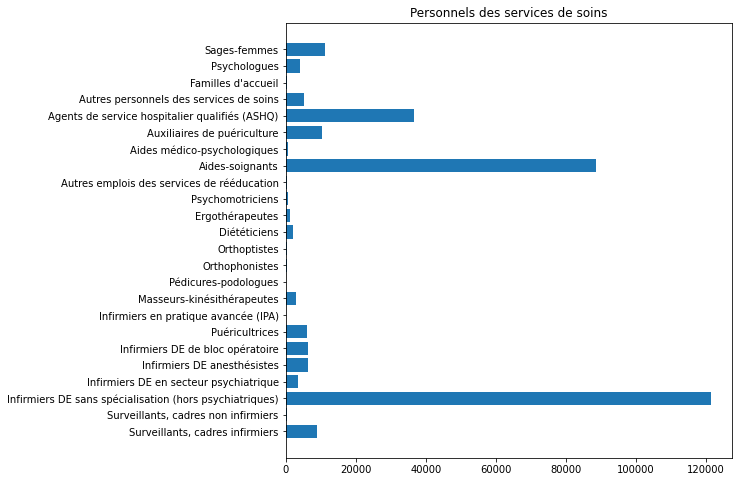

In [154]:
# Create horizontal bars
plt.figure(figsize = (8, 8))
plt.barh(y =SUM_SERV_SOINS.index,  width = SUM_SERV_SOINS.sum_tot)
plt.title('Personnels des services de soins')
plt.show()

## - Le personnel administratif par établissement

In [155]:
DIR_ADMIN = VAR_EXPL_CAT[["Personnels de direction et administratifs","stjr"]]
DIR_ADMIN = DIR_ADMIN.rename(columns = {"Personnels de direction et administratifs" : "adm"})
DIR_ADMIN

,adm,stjr
0,2.250000,2
1,21.196667,1
2,4.175000,1
3,118.605000,1
4,58.450000,1
...,...,...
1147,74.950000,2
1148,22.560000,2
1149,6.600000,2
1150,23.070000,3


In [156]:
DIR_ADMIN = DIR_ADMIN.groupby("stjr").sum()
DIR_ADMIN = DIR_ADMIN.reset_index()
DIR_ADMIN
DIR_ADMIN.adm = DIR_ADMIN.adm

In [157]:
VAR_EXPL_CAT.groupby('stjr').count()


,Numero_finess,Médecins libéraux,Autres personnels médicaux libéraux,Médecins salariés,Autres personnels médicaux salariés,Personnels de direction et administratifs,Personnels des services de soins,Personnels éducatifs et sociaux,Personnels médico-techniques,Personnels techniques et ouvriers,Points_ISA,Internes,Personnel médical,Personnel médical si LIB=0.1,Personnel médical si LIB=0.9
stjr,,,,,,,,,,,,,,,
1,518,516,507,516,507,517,518,496,510,517,518,518,505,505,505
2,461,457,453,457,453,461,460,238,409,424,461,461,449,449,449
3,173,173,166,173,166,169,173,151,162,165,173,173,166,166,166


In [158]:
DIR_ADMIN["adm"].loc[(DIR_ADMIN['stjr'] == 1)] = DIR_ADMIN["adm"].loc[(DIR_ADMIN['stjr'] == 1)]/518
DIR_ADMIN["adm"].loc[(DIR_ADMIN['stjr'] == 2)] = DIR_ADMIN["adm"].loc[(DIR_ADMIN['stjr'] == 2)]/463
DIR_ADMIN["adm"].loc[(DIR_ADMIN['stjr'] == 3)] = DIR_ADMIN["adm"].loc[(DIR_ADMIN['stjr'] == 3)]/173

C:\Users\Vinciane\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Vinciane\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Vinciane\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [159]:
DIR_ADMIN['stjr'] = DIR_ADMIN['stjr'].apply(lambda x: "Public" if x == 1 else x)
DIR_ADMIN['stjr'] = DIR_ADMIN['stjr'].apply(lambda x: "Privé lucratif" if x == 2 else x)
DIR_ADMIN['stjr'] = DIR_ADMIN['stjr'].apply(lambda x: "Privé non lucratif" if x == 3 else x)


In [160]:
DIR_ADMIN

,stjr,adm
0,Public,71.614340
1,Privé lucratif,28.778963
2,Privé non lucratif,68.260694


Text(0.5, 1.0, "Effectifs des personnels de direction et administratifs (en moyenne par type d'établissement)")

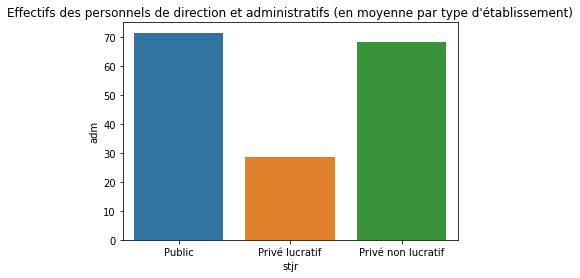

In [161]:
import seaborn as sns
#tips = sns.DIR_ADMIN("Personnels de direction et administratifs")
ax = sns.barplot(x="stjr", y="adm", data=DIR_ADMIN)
plt.title("Effectifs des personnels de direction et administratifs (en moyenne par type d'établissement)")

## Traitement des DROM

In [162]:
path_ISA = r'D:/Données/ENSAE/2A/Stat_App/ISA.csv'
ISA=pd.read_csv(path_ISA ,sep=',', encoding='latin-1')

In [163]:
ISA_DROM_97 = ISA[ISA['Numero_finess'].astype(str).str.startswith('97')]
ISA_DROM_98 = ISA[ISA['Numero_finess'].astype(str).str.startswith('97')]
ISA_DROM = pd.concat([ISA_DROM_97, ISA_DROM_98])
# établissements dans des départements d'Outre-Mer

In [164]:
ISA_DROM

,Numero_finess,Points_ISA,stjr
696,970100160,3.433260e+03,1
697,970100178,2.808527e+05,1
698,970100186,5.490866e+04,1
699,970100202,5.081250e+03,1
700,970100228,9.136090e+05,1
701,970202156,1.554146e+04,1
702,970211207,1.597206e+06,1
703,970302022,4.473254e+05,1
704,970302121,1.849167e+05,1
705,970305629,9.421212e+04,1


In [165]:
print(ISA_DROM.shape[0], "établissements sont situés dans les DROM.")

60 établissements sont situés dans les DROM.


In [166]:
Q20_97 = Q20[Q20['FI'].astype(str).str.startswith('97')]
Q20_98 = Q20[Q20['FI'].astype(str).str.startswith('98')]
Q20_DROM = pd.concat([Q20_97, Q20_98])
Q21_97 = Q21[Q21['FI'].astype(str).str.startswith('97')]
Q21_98 = Q21[Q21['FI'].astype(str).str.startswith('98')]
Q21_DROM = pd.concat([Q21_97, Q21_98])
Q23_97 = Q23[Q23['FI'].astype(str).str.startswith('97')]
Q23_98 = Q23[Q23['FI'].astype(str).str.startswith('98')]
Q23_DROM = pd.concat([Q23_97, Q23_98])

In [167]:
Q20_MET = Q20[~Q20['FI'].astype(str).str.startswith('97')]
Q20_MET = Q20_MET[~Q20_MET['FI'].astype(str).str.startswith('98')]

Q21_MET = Q21[~Q21['FI'].astype(str).str.startswith('97')]
Q21_MET = Q21_MET[~Q21_MET['FI'].astype(str).str.startswith('98')]

Q23_MET = Q23[~Q23['FI'].astype(str).str.startswith('97')]
Q23_MET = Q23_MET[~Q23_MET['FI'].astype(str).str.startswith('98')]


In [168]:
Q20_DROM

,BOR,AN,FI,FI_EJ,PERSO,EFFSALPLH,EFFSALPLF,EFFSALPAH,EFFSALPAF,EFFLIBPLH,...,ETPSALF,ETP_PU,ETP_PH,ETP_AS,ETP_HU,ETP_AT,ETP_AU,EFFSAL,ETPSAL,EFFLIB
32747,Q20,2019,970100012,970100103,M1010,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
32748,Q20,2019,970100012,970100103,M1020,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
32749,Q20,2019,970100012,970100103,M1030,2.0,1.0,NaN,NaN,1.0,...,1.00,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.00,1.0
32750,Q20,2019,970100012,970100103,M1040,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
32751,Q20,2019,970100012,970100103,M1050,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33726,Q20,2019,980500011,980500003,M3060,NaN,NaN,1.0,NaN,NaN,...,0.11,NaN,NaN,NaN,NaN,NaN,1.01,1.0,1.01,NaN
33727,Q20,2019,980500011,980500003,M9999,110.0,74.0,23.0,19.0,NaN,...,97.01,NaN,99.18,1.35,NaN,13.21,111.24,226.0,224.98,NaN
33728,Q20,2019,980500763,970407250,M1110,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.00,NaN
33729,Q20,2019,980500763,970407250,M3050,NaN,1.0,NaN,NaN,NaN,...,1.00,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.00,NaN


In [169]:
Q21_DROM

,BOR,AN,FI,FI_EJ,DISCI,ETP_SAL,ETP_HU,ETP_MAD,ETP_INT,EFF_LIB
13127,Q21,2019,970100012,970100103,2000,4.25,NaN,NaN,NaN,63.0
13128,Q21,2019,970100012,970100103,2100,4.25,NaN,NaN,NaN,63.0
13129,Q21,2019,970100012,970100103,9999,4.25,NaN,NaN,NaN,63.0
13130,Q21,2019,970100020,970100152,2000,9.66,NaN,NaN,2.00,41.0
13131,Q21,2019,970100020,970100152,2100,6.10,NaN,NaN,2.00,41.0
...,...,...,...,...,...,...,...,...,...,...
13591,Q21,2019,980500011,980500003,2200,10.10,NaN,NaN,1.12,NaN
13592,Q21,2019,980500011,980500003,9999,224.98,NaN,NaN,54.75,NaN
13593,Q21,2019,980500763,970407250,2000,3.00,NaN,NaN,NaN,NaN
13594,Q21,2019,980500763,970407250,2100,3.00,NaN,NaN,NaN,NaN


In [170]:
Q23_DROM

,BOR,AN,FI,FI_EJ,PERSO,EFFCDI,ETPCDI,EFFCDD,ETPCDD,ETPTIT,EFFTIT,EFFPNM,ETPPNM
74643,Q23,2019,970100012,970100103,N1000,27.0,26.35,2.0,3.21,NaN,NaN,29.0,29.56
74644,Q23,2019,970100012,970100103,N1100,3.0,2.57,NaN,NaN,NaN,NaN,3.0,2.57
74645,Q23,2019,970100012,970100103,N1210,9.0,8.86,2.0,2.42,NaN,NaN,11.0,11.28
74646,Q23,2019,970100012,970100103,N1220,14.0,13.92,NaN,0.79,NaN,NaN,14.0,14.71
74647,Q23,2019,970100012,970100103,N1400,1.0,1.00,NaN,NaN,NaN,NaN,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77315,Q23,2019,980501258,970407250,N2510,2.0,1.13,NaN,NaN,NaN,NaN,2.0,1.13
77316,Q23,2019,980501258,970407250,N5000,NaN,0.62,NaN,NaN,NaN,NaN,NaN,0.62
77317,Q23,2019,980501258,970407250,N5110,NaN,0.05,NaN,NaN,NaN,NaN,NaN,0.05
77318,Q23,2019,980501258,970407250,N5130,NaN,0.57,NaN,NaN,NaN,NaN,NaN,0.57


In [171]:
Q20_DROM_good = Q20_DROM[["FI","PERSO","ETPSAL","EFFLIB"]]
Q20_DROM_good = Q20_DROM_good[Q20_DROM_good['PERSO'] == "M9999"] #On garde seulement la catégorie "total", qui regroupe l'ensemble du personnel médical
Q20_DROM_good["ETPLIB"]= Q20_DROM_good["EFFLIB"]*0.5
Q20_DROM_good =Q20_DROM_good[["FI","PERSO","ETPSAL","ETPLIB"]]

Q21_DROM_good = Q21_DROM[["FI","ETP_INT"]]
#Q22_good = Q22_good[["Numero_finess","INTTOT"]] => plus très utile si on a Q21
Q23_DROM_good = Q23_DROM[["FI","PERSO","ETPPNM"]]
Q23_DROM_good = Q23_DROM_good[Q23_DROM_good['PERSO'] == "N9999"]

In [172]:
Q20_MET_good = Q20_MET[["FI","PERSO","ETPSAL","EFFLIB"]]
Q20_MET_good = Q20_MET_good[Q20_MET_good['PERSO'] == "M9999"] #On garde seulement la catégorie "total", qui regroupe l'ensemble du personnel médical
Q20_MET_good["ETPLIB"]= Q20_MET_good["EFFLIB"]*0.5
Q20_MET_good =Q20_MET_good[["FI","PERSO","ETPSAL","ETPLIB"]]

Q21_MET_good = Q21_MET[Q21_MET['DISCI'] == 9999]
Q21_MET_good = Q21_MET_good[["FI","ETP_INT"]]
#Q22_good = Q22_good[["Numero_finess","INTTOT"]] => plus très utile si on a Q21
Q23_MET_good = Q23_MET[["FI","PERSO","ETPPNM"]]
Q23_MET_good = Q23_MET_good[Q23_MET_good['PERSO'] == "N9999"]

In [173]:
Q20_DROM_good.describe()

,ETPSAL,ETPLIB
count,122.000000,59.000000
mean,23.562869,5.584746
std,65.973653,9.441358
min,0.050000,0.000000
25%,1.000000,0.500000
50%,2.340000,1.500000
75%,6.882500,4.500000
max,359.470000,34.500000


In [174]:
Q20_MET_good.describe()

,ETPSAL,ETPLIB
count,3377.000000,1490.000000
mean,24.607664,13.761074
std,66.424943,22.049336
min,0.000000,0.000000
25%,1.190000,1.000000
50%,3.500000,3.000000
75%,10.660000,17.500000
max,913.660000,153.500000


In [175]:
Q21_MET_good.describe()

,ETP_INT
count,1288.000000
mean,25.567585
std,67.132084
min,0.000000
25%,0.830000
50%,3.000000
75%,17.322500
max,674.570000


In [176]:
Q21_DROM_good.describe()

,ETP_INT
count,147.000000
mean,23.095578
std,54.320403
min,0.000000
25%,0.320000
50%,2.950000
75%,12.595000
max,262.900000


In [177]:
Q21_DROM_good.describe()

,ETP_INT
count,147.000000
mean,23.095578
std,54.320403
min,0.000000
25%,0.320000
50%,2.950000
75%,12.595000
max,262.900000


In [178]:
Q21_MET_good.describe()

,ETP_INT
count,1288.000000
mean,25.567585
std,67.132084
min,0.000000
25%,0.830000
50%,3.000000
75%,17.322500
max,674.570000


In [179]:
Q21_MET_good

,FI,ETP_INT
4,010000024,65.03
9,010000032,2.15
14,010000065,1.16
18,010000081,NaN
22,010000099,NaN
...,...,...
13114,950805671,NaN
13117,950806166,1.00
13120,950806307,NaN
13123,950807982,NaN


In [180]:
Q23_MET_good.describe()

,ETPPNM
count,3668.000000
mean,272.275496
std,590.184210
min,0.010000
25%,30.730000
50%,74.805000
75%,210.535000
max,7158.620000


In [181]:
Q23_DROM_good.describe()

,ETPPNM
count,141.000000
mean,230.028865
std,547.612576
min,0.500000
25%,16.270000
50%,48.000000
75%,146.090000
max,2961.650000


In [182]:
ISA_DROM

,Numero_finess,Points_ISA,stjr
696,970100160,3.433260e+03,1
697,970100178,2.808527e+05,1
698,970100186,5.490866e+04,1
699,970100202,5.081250e+03,1
700,970100228,9.136090e+05,1
701,970202156,1.554146e+04,1
702,970211207,1.597206e+06,1
703,970302022,4.473254e+05,1
704,970302121,1.849167e+05,1
705,970305629,9.421212e+04,1
